In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [73]:
indication_mapping = {'Melanoma':'KML', 
                      'Head & Neck Ca':'KHN',
                      'Other Head & Neck Ca':'KHN',
                      'NSCLC':'KLC',
                      'Other than SCLC':'KLC',
                      'Urothelial Ca':'KUC',
                      'RCC':'KRC'
                      }

#### Creating indication launch and patient count data for key competitiors.

In [74]:
df_mdv_indication = pd.read_csv("MDV_IndicationMaster.csv",encoding= 'unicode_escape',usecols=[1,2,4])
df_mdv_indication.columns = ['YM','Drug','Indication']
# df_mdv_indication['Indication'] = df_mdv_indication['Indication'].map(indication_mapping)
df_mdv_indication['Indication'] = df_mdv_indication['Indication'].replace(indication_mapping)
# df_mdv_indication['Indication'].fillna('Others',inplace=True)
df_mdv_indication.rename(columns={'YM':'Launch_month'},inplace=True)
df_mdv_indication = df_mdv_indication.sort_values(['Drug','Launch_month'])
df_mdv_indication = df_mdv_indication.drop_duplicates(['Drug','Indication'],keep='first')
df_mdv_indication = df_mdv_indication.reset_index(drop=True)
print(df_mdv_indication.shape)
df_mdv_indication

(104, 3)


Launch_month                           Drug  Indication
0          201401               Afatinib Maleate         KLC
1          201804                   Atezolizumab         KLC
2          201908                   Atezolizumab        SCLC
3          201909                   Atezolizumab   Breast Ca
4          202009                   Atezolizumab    Liver Ca
..            ...                            ...         ...
99         201603  Trametinib Dimethyl Sulfoxide         KML
100        201803  Trametinib Dimethyl Sulfoxide         KLC
101        201103                    Trastuzumab  Gastric Ca
102        201806                    Trastuzumab   Breast Ca
103        201309          Trastuzumab Emtansine   Breast Ca

[104 rows x 3 columns]

In [75]:
df_mdv_tumor = pd.read_csv("MDV_tumortype_data.csv",encoding= 'unicode_escape')
df_mdv_tumor.columns = ['YM','Drug','Indication','number_of_patients']
df_mdv_tumor['Indication'] = df_mdv_tumor['Indication'].replace(indication_mapping)
# df_mdv_tumor['Indication'].fillna('Others',inplace=True)
df_mdv_tumor = df_mdv_tumor.sort_values(['Drug','YM']).reset_index(drop=True)
df_mdv_tumor

YM                               Drug   Indication  \
0       201812                        Abemaciclib    Breast Ca   
1       201812                        Abemaciclib       Others   
2       201812                        Abemaciclib   Thyroid Ca   
3       201901                        Abemaciclib    Breast Ca   
4       201901                        Abemaciclib          KLC   
...        ...                                ...          ...   
111793  202002  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111794  202003  Yttrium(90Y) Ibritumomab Tiuxetan    Breast Ca   
111795  202003  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111796  202003  Yttrium(90Y) Ibritumomab Tiuxetan       Others   
111797  202004  Yttrium(90Y) Ibritumomab Tiuxetan       Others   

        number_of_patients  
0                       21  
1                       27  
2                        1  
3                       60  
4                        1  
...                    ...  
111793                   1  
111794                   1  
111795                   2  
111796                   1  
111797                   1  

[111798 rows x 4 columns]

In [76]:
df_patient_count_and_launch = df_mdv_indication.merge(df_mdv_tumor, on = ['Drug','Indication'],how='left')

In [77]:
df_patient_count_and_launch.isnull().sum()

Launch_month          0
Drug                  0
Indication            0
YM                    9
number_of_patients    9
dtype: int64

In [78]:
df_patient_count_and_launch = df_patient_count_and_launch[df_patient_count_and_launch['number_of_patients'].notnull()]
df_patient_count_and_launch['YM'] = df_patient_count_and_launch['YM'].astype(int)

In [79]:
df_patient_count_and_launch.nunique()

Launch_month            66
Drug                    30
Indication              28
YM                      56
number_of_patients    1013
dtype: int64

In [80]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  
0                  318.0  
1                  324.0  
2                  318.0  
3                  325.0  
4                  328.0  
...                  ...  
4962               185.0  
4963               178.0  
4964               183.0  
4965               179.0  
4966               178.0  

[4958 rows x 5 columns]

In [81]:
df_patient_count_and_launch['is_data_ok'] = np.where(df_patient_count_and_launch['YM']>= df_patient_count_and_launch['Launch_month'],1,0)

In [82]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [83]:
df_patient_count_and_launch['is_data_ok'].value_counts()

1    4505
0     453
Name: is_data_ok, dtype: int64

In [84]:
df_patient_count_and_launch[df_patient_count_and_launch['is_data_ok']==0]['Drug'].unique()

array(['Atezolizumab', 'Bevacizumab', 'Everolimus', 'Ipilimumab',
       'Nivolumab', 'Olaparib', 'Pembrolizumab', 'Ramucirumab',
       'Regorafenib Hydrate', 'Trastuzumab'], dtype=object)

In [85]:
filter_for_0_patients = (df_patient_count_and_launch['is_data_ok']==0) 
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients'] = 0
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients']

88      0.0
89      0.0
90      0.0
91      0.0
108     0.0
       ... 
4876    0.0
4877    0.0
4878    0.0
4879    0.0
4880    0.0
Name: number_of_patients, Length: 453, dtype: float64

In [86]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [87]:
df_patient_count_and_launch['Indication'].unique()

array(['KLC', 'SCLC', 'Breast Ca', 'Liver Ca', 'Others', 'KRC', 'CRC',
       'Glioma', 'Ovarian Ca', 'Cervical Ca', 'KHN', 'KML', 'Gastric Ca',
       'Esophageal Ca', 'Endmetarial Ca', 'Prostate',
       'Pancreatic Neuroendocrine Tumors', 'Vascular lipoma',
       'Subepedymal giant cell astrocytoma', 'Pancreatic Ca',
       'Thyroid Ca', 'Hodgkin', 'Malignant pleural mesothelioma',
       'CRC MSI-H', 'Liposarcoma', 'KUC', 'MSI-H',
       'Gastrointestinal stromal tumor'], dtype=object)

In [88]:
filter_for_specific_indications = (df_patient_count_and_launch['Indication']!='KLC') & \
                        (df_patient_count_and_launch['Indication']!='KRC') & \
                        (df_patient_count_and_launch['Indication']!='KHN') & \
                        (df_patient_count_and_launch['Indication']!='KML') & \
                        (df_patient_count_and_launch['Indication']!='KUC')
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication'] = 'Others'
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication']

88      Others
89      Others
90      Others
91      Others
92      Others
         ...  
4962    Others
4963    Others
4964    Others
4965    Others
4966    Others
Name: Indication, Length: 2980, dtype: object

In [89]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine     Others  202007   
4963        201309  Trastuzumab Emtansine     Others  202008   
4964        201309  Trastuzumab Emtansine     Others  202009   
4965        201309  Trastuzumab Emtansine     Others  202010   
4966        201309  Trastuzumab Emtansine     Others  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [90]:
df_patient_count_and_launch.Indication.unique()

array(['KLC', 'Others', 'KRC', 'KHN', 'KML', 'KUC'], dtype=object)

In [91]:
df_patient_count_and_launch = df_patient_count_and_launch.groupby(['Drug','Indication','YM']).agg({'number_of_patients':'sum','Launch_month':'min'}).reset_index()

In [92]:
df_patient_count_and_launch.nunique()

Drug                   30
Indication              6
YM                     56
number_of_patients    923
Launch_month           49
dtype: int64

In [93]:
df_patient_count_and_launch['Drug_Indication'] = df_patient_count_and_launch['Drug'].astype(str) + '_' + \
                                                 df_patient_count_and_launch['Indication'].astype(str)
df_patient_count_and_launch

Drug Indication      YM  number_of_patients  \
0          Afatinib Maleate        KLC  201604               318.0   
1          Afatinib Maleate        KLC  201605               324.0   
2          Afatinib Maleate        KLC  201606               318.0   
3          Afatinib Maleate        KLC  201607               325.0   
4          Afatinib Maleate        KLC  201608               328.0   
...                     ...        ...     ...                 ...   
2747  Trastuzumab Emtansine     Others  202007               185.0   
2748  Trastuzumab Emtansine     Others  202008               178.0   
2749  Trastuzumab Emtansine     Others  202009               183.0   
2750  Trastuzumab Emtansine     Others  202010               179.0   
2751  Trastuzumab Emtansine     Others  202011               178.0   

      Launch_month               Drug_Indication  
0           201401          Afatinib Maleate_KLC  
1           201401          Afatinib Maleate_KLC  
2           201401          Afatinib Maleate_KLC  
3           201401          Afatinib Maleate_KLC  
4           201401          Afatinib Maleate_KLC  
...            ...                           ...  
2747        201309  Trastuzumab Emtansine_Others  
2748        201309  Trastuzumab Emtansine_Others  
2749        201309  Trastuzumab Emtansine_Others  
2750        201309  Trastuzumab Emtansine_Others  
2751        201309  Trastuzumab Emtansine_Others  

[2752 rows x 6 columns]

In [94]:
df_monthly_patient_count_competitors = df_patient_count_and_launch.pivot(index='YM',columns='Drug_Indication',values='number_of_patients').reset_index()

In [95]:
df_monthly_patient_count_competitors

Drug_Indication      YM  Afatinib Maleate_KLC  Atezolizumab_KLC  \
0                201604                 318.0               NaN   
1                201605                 324.0               NaN   
2                201606                 318.0               NaN   
3                201607                 325.0               NaN   
4                201608                 328.0               NaN   
5                201609                 324.0               NaN   
6                201610                 328.0               NaN   
7                201611                 339.0               NaN   
8                201612                 350.0               NaN   
9                201701                 358.0               NaN   
10               201702                 354.0               NaN   
11               201703                 377.0               NaN   
12               201704                 372.0               NaN   
13               201705                 383.0               NaN   
14               201706                 399.0               NaN   
15               201707                 405.0               NaN   
16               201708                 424.0               NaN   
17               201709                 414.0               NaN   
18               201710                 438.0               NaN   
19               201711                 434.0               NaN   
20               201712                 436.0               NaN   
21               201801                 429.0               NaN   
22               201802                 431.0               NaN   
23               201803                 443.0               NaN   
24               201804                 456.0              10.0   
25               201805                 464.0              69.0   
26               201806                 467.0             122.0   
27               201807                 481.0             161.0   
28               201808                 480.0             181.0   
29               201809                 431.0             200.0   
30               201810                 448.0             208.0   
31               201811                 414.0             206.0   
32               201812                 402.0             203.0   
33               201901                 369.0             234.0   
34               201902                 348.0             256.0   
35               201903                 323.0             259.0   
36               201904                 337.0             270.0   
37               201905                 326.0             293.0   
38               201906                 305.0             291.0   
39               201907                 298.0             310.0   
40               201908                 290.0             295.0   
41               201909                 270.0             302.0   
42               201910                 281.0             318.0   
43               201911                 260.0             326.0   
44               201912                 271.0             345.0   
45               202001                 274.0             357.0   
46               202002                 242.0             353.0   
47               202003                 257.0             392.0   
48               202004                 262.0             399.0   
49               202005                 221.0             380.0   
50               202006                 247.0             391.0   
51               202007                 259.0             403.0   
52               202008                 242.0             411.0   
53               202009                 243.0             414.0   
54               202010                 240.0             412.0   
55               202011                 235.0             406.0   

Drug_Indication  Atezolizumab_Others  Avelumab_KRC  Avelumab_Others  \
0                                NaN           NaN              NaN   
1                                NaN  

In [96]:
df_monthly_patient_count_competitors.columns

Index(['YM', 'Afatinib Maleate_KLC', 'Atezolizumab_KLC', 'Atezolizumab_Others',
       'Avelumab_KRC', 'Avelumab_Others', 'Axitinib_KRC', 'Bevacizumab_KLC',
       'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_KHN',
       'Cetuximab_Others', 'Dabrafenib Mesilate_KLC',
       'Dabrafenib Mesilate_KML', 'Dacomitinib Hydrate_KLC', 'Docetaxel_KHN',
       'Docetaxel_KLC', 'Docetaxel_Others', 'Erlotinib Hydrochloride_KLC',
       'Everolimus_KRC', 'Everolimus_Others', 'Gefitinib_KLC',
       'Ipilimumab_KLC', 'Ipilimumab_KML', 'Ipilimumab_KRC',
       'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC',
       'Nivolumab_KML', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others',
       'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN',
       'Paclitaxel_KLC', 'Paclitaxel_Others', 'Pazopanib Hydrochloride_KRC',
       'Pazopanib Hydrochloride_Others', 'Pembrolizumab_KHN',
       'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC',
    

In [97]:
df_monthly_patient_count_competitors = df_monthly_patient_count_competitors[[col for col in df_monthly_patient_count_competitors.columns if 'pembro' not in col.lower()]+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower() ]]

In [98]:
print(df_monthly_patient_count_competitors.shape)
df1 = df_monthly_patient_count_competitors.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.9) or any(upper[column] < -0.9))]
print(len(high_cor))
print(high_cor)

(56, 58)
34
['Atezolizumab_KLC', 'Avelumab_KRC', 'Avelumab_Others', 'Bevacizumab_KLC', 'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_Others', 'Erlotinib Hydrochloride_KLC', 'Gefitinib_KLC', 'Ipilimumab_KRC', 'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others', 'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN', 'Pazopanib Hydrochloride_KRC', 'Ramucirumab_KLC', 'Ramucirumab_Others', 'Sorafenib Tosilate_Others', 'Sunitinib Malate_KRC', 'Trametinib Dimethyl Sulfoxide_KLC', 'Trametinib Dimethyl Sulfoxide_KML', 'Trastuzumab Emtansine_Others', 'Trastuzumab_Others', 'Pembrolizumab_KHN', 'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC', 'Pembrolizumab_KUC', 'Pembrolizumab_Others']


<AxesSubplot:xlabel='Drug_Indication', ylabel='Drug_Indication'>

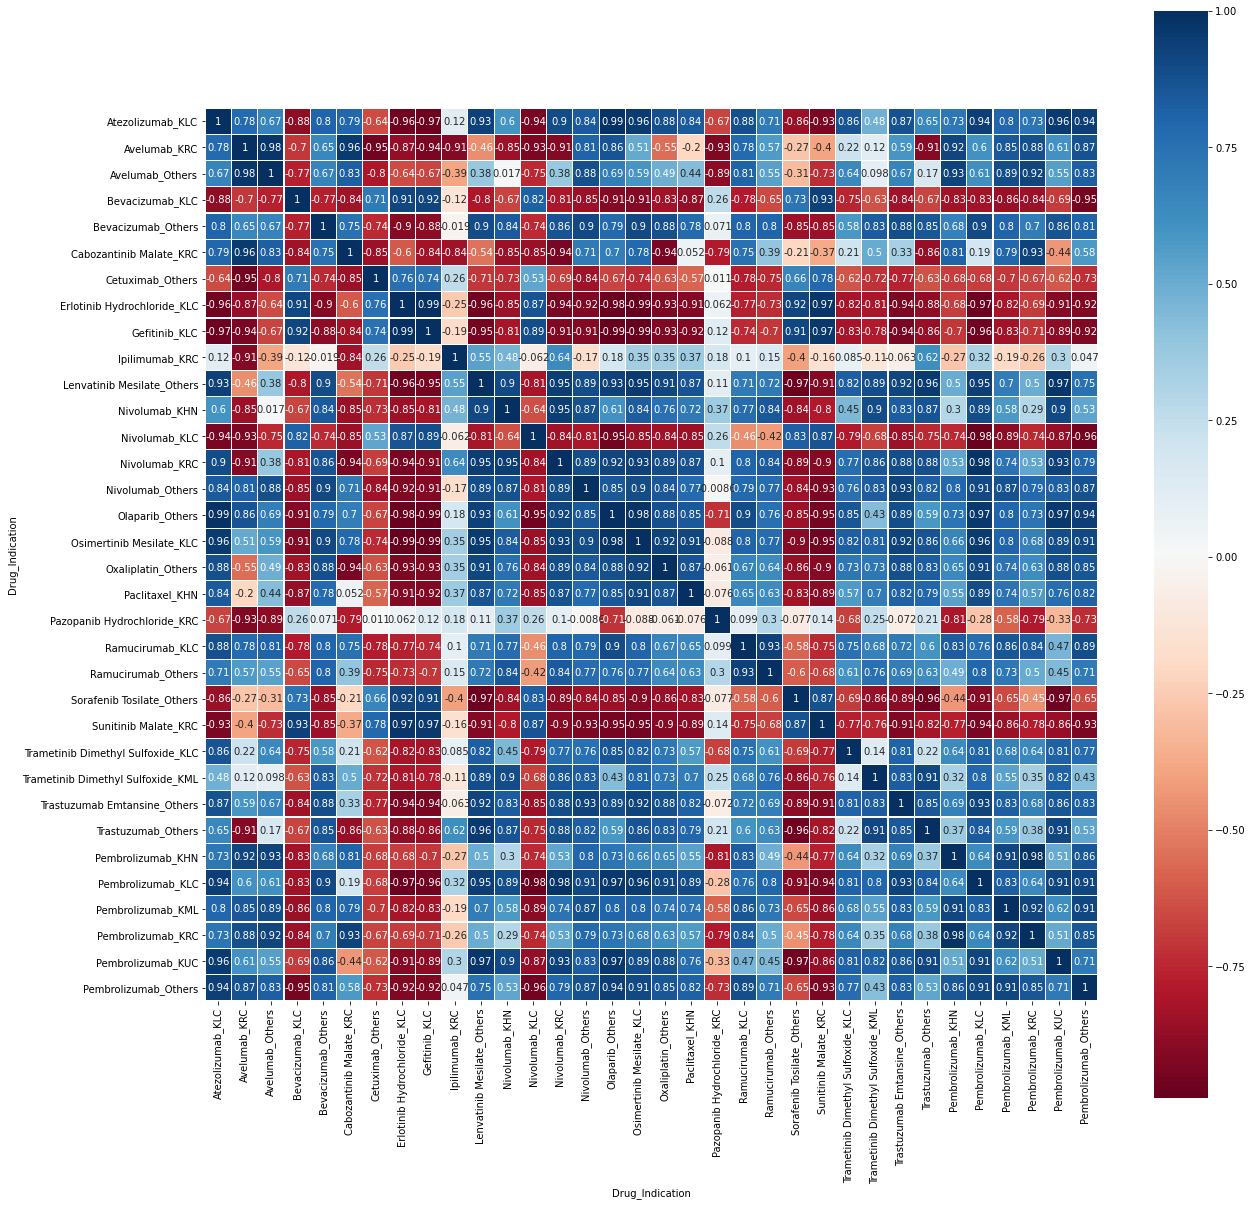

In [99]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_monthly_patient_count_competitors[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [100]:
df_monthly_patient_count_keytruda = df_monthly_patient_count_competitors[['YM']+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower()]]

In [101]:
df_monthly_patient_count_keytruda['total_patients'] = df_monthly_patient_count_keytruda.iloc[:,1:].sum(axis = 1, skipna = True)
df_monthly_patient_count_keytruda

Drug_Indication      YM  Pembrolizumab_KHN  Pembrolizumab_KLC  \
0                201604                NaN                NaN   
1                201605                NaN                NaN   
2                201606                NaN                NaN   
3                201607                NaN                NaN   
4                201608                NaN                NaN   
5                201609                NaN                NaN   
6                201610                NaN                NaN   
7                201611                NaN                NaN   
8                201612                NaN                NaN   
9                201701                NaN                NaN   
10               201702                NaN                2.0   
11               201703                NaN               71.0   
12               201704                0.0              160.0   
13               201705                0.0              227.0   
14               201706                0.0              290.0   
15               201707                0.0              341.0   
16               201708                0.0              378.0   
17               201709                0.0              393.0   
18               201710                0.0              430.0   
19               201711                0.0              426.0   
20               201712                0.0              427.0   
21               201801                0.0              475.0   
22               201802                0.0              500.0   
23               201803                0.0              516.0   
24               201804                0.0              557.0   
25               201805                0.0              591.0   
26               201806                0.0              599.0   
27               201807                0.0              610.0   
28               201808                0.0              654.0   
29               201809                0.0              636.0   
30               201810                0.0              654.0   
31               201811                0.0              685.0   
32               201812                0.0              676.0   
33               201901                0.0              775.0   
34               201902                0.0              838.0   
35               201903                0.0              913.0   
36               201904                0.0              965.0   
37               201905                0.0             1021.0   
38               201906                0.0             1033.0   
39               201907                0.0             1095.0   
40               201908                0.0             1082.0   
41               201909                0.0             1086.0   
42               201910                0.0             1125.0   
43               201911                0.0             1131.0   
44               201912               13.0             1131.0   
45               202001               22.0             1185.0   
46               202002               37.0             1163.0   
47               202003               47.0             1177.0   
48               202004               61.0             1158.0   
49               202005               70.0             1173.0   
50               202006               89.0             1208.0   
51               202007               79.0             1230.0   
52               202008               84.0             1200.0   
53               202009               88.0             1216.0   
54               202010               96.0             1240.0   
55               202011               97.0             1181.0   

Drug_Indication  Pembrolizumab_KML  Pembrolizumab_KRC  Pembrolizumab_KUC  \
0                              NaN                NaN                NaN   
1                              NaN                NaN                NaN   
2                              NaN                NaN             

In [102]:
# df_patient_count_and_launch.to_csv('indication_launch+patients_info.csv',index=False)

#### Creating sales data (keytruda + competitors for target accounts)

In [103]:
df_inhouse_sales = pd.read_excel("S001_Inhouse_Sales_YMD_from_Launch.xlsx",sheet_name='Sheet2')
df_inhouse_sales.drop(columns=['HP_GP_TYPE','Ins_Type','Prod_abbr','Ins_DCF_Code','PROD_FAM_CODE'],inplace=True)
df_inhouse_sales.sort_values(['PROD_NAME_ENG','YM'],inplace = True)
df_inhouse_sales = df_inhouse_sales.reset_index(drop=True)
print(df_inhouse_sales.shape)

df_inhouse_sales_by_account = df_inhouse_sales.groupby(['Ins_Code','PROD_NAME_ENG','YM']).agg({'NHI National Health Insurance (JPY)':'sum',
                                                                 'QTY':'sum'}).reset_index()

(546428, 8)


In [104]:
df_inhouse_sales_by_account_trget = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('Ins_Code').agg({'NHI National Health Insurance (JPY)':'sum'}).reset_index()
df_inhouse_sales_by_account_trget

Ins_Code  NHI National Health Insurance (JPY)
0      1000001                         4.223230e+08
1      1000011                         1.126512e+08
2      1000021                         1.146593e+09
3      1000031                         2.108046e+08
4      1000040                         3.143635e+08
...        ...                                  ...
1352   2024478                         2.932496e+07
1353   2024527                         5.523438e+06
1354   2024650                         1.250101e+07
1355   2026683                         2.908260e+07
1356   2027022                         1.841532e+07

[1357 rows x 2 columns]

In [105]:
df_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_inhouse_sales_by_YM

YM  NHI National Health Insurance (JPY)      QTY
0   201702                         4.701825e+07    114.4
1   201703                         6.345510e+08   1545.6
2   201704                         1.514960e+09   3689.0
3   201705                         2.109301e+09   5137.2
4   201706                         2.740174e+09   6673.4
5   201707                         3.092276e+09   7530.2
6   201708                         3.700607e+09   9012.4
7   201709                         3.521340e+09   8574.8
8   201710                         4.197920e+09  10222.8
9   201711                         4.394170e+09  10701.0
10  201712                         4.686511e+09  11411.4
11  201801                         4.686197e+09  11413.2
12  201802                         5.385852e+09  13116.4
13  201803                         5.428329e+09  13220.2
14  201804                         6.501790e+09  17826.2
15  201805                         6.294440e+09  17258.8
16  201806                         6.468792e+09  17739.2
17  201807                         6.615705e+09  18142.0
18  201808                         7.384187e+09  20250.0
19  201809                         6.273144e+09  17201.8
20  201810                         7.760682e+09  21283.2
21  201811                         7.521468e+09  20625.2
22  201812                         7.786373e+09  21355.6
23  201901                         8.290029e+09  22735.4
24  201902                         8.447986e+09  23170.6
25  201903                         8.145908e+09  22342.0
26  201904                         1.142012e+10  31322.6
27  201905                         9.782138e+09  26829.6
28  201906                         1.040667e+10  28542.6
29  201907                         1.136752e+10  31178.0
30  201908                         1.206721e+10  33097.0
31  201909                         1.387860e+10  38065.0
32  201910                         1.072167e+10  28872.0
33  201911                         1.116612e+10  30069.0
34  201912                         1.264073e+10  34040.0
35  202001                         1.127643e+10  30366.0
36  202002                         1.091866e+10  35655.0
37  202003                         9.986198e+09  32610.0
38  202004                         1.041015e+10  42954.0
39  202005                         7.657696e+09  31597.0
40  202006                         9.816587e+09  40505.0
41  202007                         9.682569e+09  39952.0
42  202008                         9.436578e+09  38937.0
43  202009                         9.514853e+09  39260.0
44  202010                         1.082236e+10  44655.0
45  202011                         9.540798e+09  39367.0
46  202012                         1.066896e+10  44022.0
47  202101                         1.024749e+10  42283.0
48  202102                         6.260258e+09  25831.0

In [106]:
df_YM_sales_patients_keytruda = df_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

<AxesSubplot:>

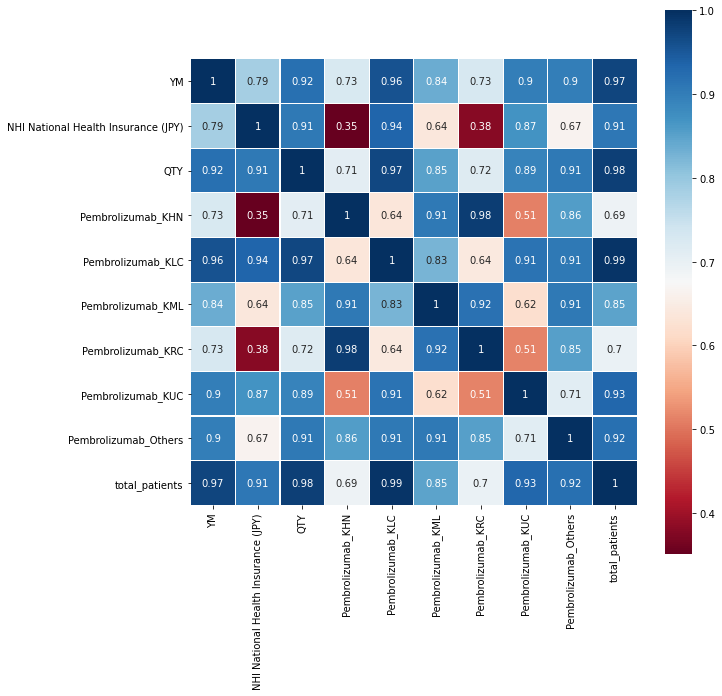

In [107]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [108]:
# here we see that total patients are correlated with QTY by 0.98
# also, patients in KLC is correlated with total patients by 0.99 , this is good as we are starting our base modeling using KLC by approach 1

In [109]:
# hospital_type_mapping = {'Pharmacy': 'Pharmacy', 'GP': ['Doctors Association', 'Hospital/Clinic', 'Others'] , 
#                          'HP': ['Major Hospital (>500 bed)', 'Mid-sized Hospital (200~499 Beds)', 'University Hospital']
#                         }

In [113]:
df_trgt = pd.read_excel("N001_Ins_Master.xlsx",usecols=[i for i in range(39) if i not in (1,2,3,4,6,8,10,12,14,16,17,18)])
df_trgt =df_trgt.dropna(subset=['KLC_TGT', 'KUC_TGT', 'KRC_TGT', 'KHN_TGT', 'KML_TGT', 'KHL_TGT', 'KMS_TGT', 'KES_TGT',
                           'KX_TGT'], how='all')
df_trgt.Ins_Code = df_trgt.Ins_Code.astype(int)
df_trgt.shape

# print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
# print("Keytruda unique accounts for which have Sales (Yen) >0 from 201702:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code'])))
# print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
print("Keytruda unique accounts for which have Sales from 201702:",len(set(df_inhouse_sales_by_account_trget['Ins_Code'])))
print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

# target_acc = pd.DataFrame()
# target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
# target_acc.to_csv('target_accounts.csv',index=False)

target_acc = pd.DataFrame()
target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
target_acc.to_csv('target_accounts.csv',index=False)

# non_target_acc = pd.DataFrame()
# non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
# non_target_acc.to_csv('non_target_accounts.csv',index=False)

non_target_acc = pd.DataFrame()
non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
non_target_acc.to_csv('non_target_accounts.csv',index=False)

target_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

nontarget_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(non_target_acc['non_target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

print(nontarget_acc_sales/target_acc_sales)
print(nontarget_acc_sales/(target_acc_sales+nontarget_acc_sales))
print(target_acc_sales/(target_acc_sales+nontarget_acc_sales))

df_inhouse_sales_by_account = df_inhouse_sales_by_account[df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]

Keytruda unique accounts for which we have target flags: 928
Keytruda unique accounts for which have Sales from 201702: 1357
Keytruda Target Accounts: 914
0.0287478713906222
0.02794452575805763
0.9720554742419424


In [114]:
df_inhouse_sales_by_account

Ins_Code PROD_NAME_ENG      YM  NHI National Health Insurance (JPY)  \
0        1000001      Keytruda  201709                             821082.0   
1        1000001      Keytruda  201710                             821082.0   
2        1000001      Keytruda  201711                            2137193.0   
3        1000001      Keytruda  201712                            2137193.0   
4        1000001      Keytruda  201801                            2958275.0   
...          ...           ...     ...                                  ...   
145900   2026683      Lynparza  202010                             290366.0   
145901   2026683      Lynparza  202011                            1843000.0   
145902   2026683      Lynparza  202012                            2619317.0   
145903   2026683      Lynparza  202101                            2524536.0   
145904   2026683      Lynparza  202102                             580731.0   

        QTY  
0       2.0  
1       2.0  
2       5.2  
3       5.2  
4       7.2  
...     ...  
145900  1.0  
145901  6.3  
145902  9.0  
145903  8.7  
145904  2.0  

[78219 rows x 5 columns]

In [115]:
df_trgt

Ins_Code HP_GP_TYPE (english)                 Ins_Type (english)  \
0        1000001                   HP         Major Hospital (>500 beds)   
9        1000011                   HP  Mid-sized Hospital (200~499 Beds)   
17       1000021                   HP                University Hospital   
24       1000031                   HP         Major Hospital (>500 beds)   
33       1000040                   HP  Mid-sized Hospital (200~499 Beds)   
...          ...                  ...                                ...   
193614   1698513                   HP  Mid-sized Hospital (200~499 Beds)   
193789   1701677                   HP  Mid-sized Hospital (200~499 Beds)   
194398   1708663                   HP         Major Hospital (>500 beds)   
206945   2024478                   HP                University Hospital   
207953   2026683                   HP         Major Hospital (>500 beds)   

        Pref_Code  City_Code  Jis_City_Code   Zip_Code  KLC_DIA  KUC_DIA  \
0               1       1101           1101   600011.0      8.0      2.0   
9               1       1101           1101   600004.0     10.0      9.0   
17              1       1101           1101   600061.0      6.0      3.0   
24              1       1101           1101   600033.0      8.0      6.0   
33              1       1101           1101   600061.0      8.0      8.0   
...           ...        ...            ...        ...      ...      ...   
193614         17      17252          17206  9228522.0     10.0     10.0   
193789          9       9209           9203  3294407.0      9.0      7.0   
194398         28      28214          28210  6750037.0      8.0      3.0   
206945         12      12219          12211  2860124.0      NaN      NaN   
207953         14      14123          14102  2210855.0      NaN      NaN   

        KRC_DIA  KHN_DIA  KES_DIA  LYNPA_DIA  KML_DIA  KLC_TGT  KUC_TGT  \
0           3.0      8.0     10.0        8.0     11.0      1.0      1.0   
9           7.0     10.0      7.0        4.0     11.0      1.0      1.0   
17          3.0      3.0      7.0        3.0      8.0      1.0      1.0   
24          5.0      NaN     10.0        3.0     11.0      1.0      1.0   
33          9.0      NaN     10.0        9.0     11.0      1.0      1.0   
...         ...      ...      ...        ...      ...      ...      ...   
193614     10.0      NaN      NaN        NaN     11.0      NaN      1.0   
193789     10.0      NaN      NaN       10.0     11.0      1.0      1.0   
194398      9.0      9.0      8.0        6.0     11.0      1.0      NaN   
206945      NaN      NaN      NaN        NaN      NaN      1.0      1.0   
207953      NaN      NaN      NaN        NaN      NaN      1.0      1.0   

        KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  PAT_TGT  \
0           1.0      1.0      1.0      1.0      1.0      NaN     1.0      1.0   
9           1.0      NaN      NaN      NaN      1.0      1.0     NaN      NaN   
17          1.0      1.0      1.0      1.0      1.0      1.0     1.0      1.0   
24          1.0      NaN      NaN      NaN      1.0      NaN     NaN      1.0   
33          1.0      NaN      NaN      NaN      1.0      NaN     NaN      1.0   
...         ...      ...      ...      ...      ...      ...     ...      ...   
193614      1.0      NaN      NaN      NaN      1.0      NaN     NaN      NaN   
193789      NaN      NaN      NaN      NaN      1.0      NaN     1.0      NaN   
194398      NaN      NaN      NaN      NaN      1.0      NaN     NaN      NaN   
206945      1.0      1.0      1.0      NaN      1.0      1.0     1.0      1.0   
207953      1.0      1.0      NaN      1.0      1.0      1.0     1.0      1.0   

        LYO_TGT  LYNPA_TGT  LEN_TGT  
0           1.0        1.0      1.0  
9           NaN        1.0      NaN  
17          1.0        1.0      1.0  
24          1.0        1.0      1.0  
33          1.0        NaN      NaN  
...         ...        ...      ...  
193614      NaN        NaN      NaN  
1937

In [116]:
# df_inhouse_sales_by_account.to_csv('inhouse_sales_for_target_accounts.csv',index=False)

In [117]:
df_target_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_target_inhouse_sales_by_YM

YM  NHI National Health Insurance (JPY)      QTY
0   201702                         4.701825e+07    114.4
1   201703                         6.221503e+08   1515.4
2   201704                         1.489506e+09   3627.0
3   201705                         2.063888e+09   5026.6
4   201706                         2.680972e+09   6529.2
5   201707                         3.006884e+09   7322.2
6   201708                         3.609877e+09   8791.4
7   201709                         3.422387e+09   8333.8
8   201710                         4.096516e+09   9975.8
9   201711                         4.313293e+09  10504.0
10  201712                         4.596108e+09  11191.2
11  201801                         4.582076e+09  11159.6
12  201802                         5.265153e+09  12822.4
13  201803                         5.300156e+09  12908.0
14  201804                         6.365644e+09  17452.8
15  201805                         6.149319e+09  16860.8
16  201806                         6.325430e+09  17346.0
17  201807                         6.458562e+09  17711.0
18  201808                         7.212310e+09  19778.6
19  201809                         6.112720e+09  16761.8
20  201810                         7.553954e+09  20716.2
21  201811                         7.277188e+09  19955.2
22  201812                         7.563163e+09  20743.4
23  201901                         8.041951e+09  22055.0
24  201902                         8.206546e+09  22508.4
25  201903                         7.894259e+09  21651.8
26  201904                         1.109745e+10  30437.6
27  201905                         9.492570e+09  26035.4
28  201906                         1.010361e+10  27711.4
29  201907                         1.103529e+10  30266.8
30  201908                         1.176022e+10  32255.0
31  201909                         1.356832e+10  37214.0
32  201910                         1.038560e+10  27967.0
33  201911                         1.085716e+10  29237.0
34  201912                         1.224190e+10  32966.0
35  202001                         1.090842e+10  29375.0
36  202002                         1.059100e+10  34585.0
37  202003                         9.671388e+09  31582.0
38  202004                         1.011206e+10  41724.0
39  202005                         7.433517e+09  30672.0
40  202006                         9.522125e+09  39290.0
41  202007                         9.392955e+09  38757.0
42  202008                         9.150114e+09  37755.0
43  202009                         9.216514e+09  38029.0
44  202010                         1.049494e+10  43304.0
45  202011                         9.256757e+09  38195.0
46  202012                         1.031464e+10  42560.0
47  202101                         9.950361e+09  41057.0
48  202102                         6.073887e+09  25062.0

In [118]:
df_target_YM_sales_patients_keytruda = df_target_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

<AxesSubplot:>

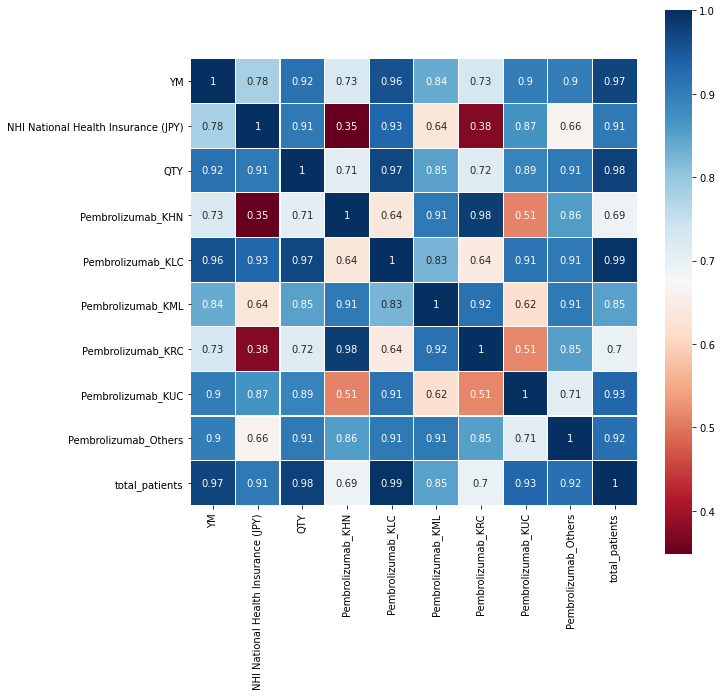

In [119]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_target_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

#### DDD sales

In [120]:
df_market_sales_from_201804 = pd.read_csv("S002_Market_Sales_from_201804.csv", encoding= 'ansi')
df_market_sales_from_201804.drop(columns=['BRICK_NAME','Ins_DCF_Code','Ins_Name_abbr','ATC3_CODE','ATC3_NAME',
                                         'PROD3_CODE','PROD3_NAME','ATC3_NAME_ENG','PROD_oldest_data_month'],inplace=True)

df_DDD = df_market_sales_from_201804[df_market_sales_from_201804['Ins_Code'].notnull()]
df_DDD = df_DDD[df_DDD['Ins_Code'].isin(list(target_acc['target_accounts']))]
print(df_DDD.shape, len(set(df_DDD.Ins_Code)))

(705413, 6) 914


In [121]:
df_DDD.YM.min(), df_DDD.YM.max()

(201804, 202101)

In [122]:
# df_DDD.to_csv('market_sales_for_target_accounts.csv',index=False)

In [123]:
print(df_DDD.shape)
print(df_DDD.isnull().sum())
print(df_DDD.nunique())
print(df_DDD.PROD3_NAME_ENG.unique())

(705413, 6)
BRICK_CODE        0
BRICK_CLASS       0
Ins_Code          0
PROD3_NAME_ENG    0
YM                0
YEN               0
dtype: int64
BRICK_CODE           922
BRICK_CLASS            2
Ins_Code             914
PROD3_NAME_ENG        74
YM                    34
YEN               109711
dtype: int64
['S 1 TAIHO COM.OD T' 'CAPECITABINE SAWAI' 'CAPECITABINE YAKUL' 'ALIMTA'
 'TS 1 COMBINATION T' 'TS 1 COMBINATION T OD' 'XELODA' 'PERJETA' 'KADCYLA'
 'ADCETRIS' 'OPDIVO' 'CYRAMZA' 'YERVOY' 'KEYTRUDA' 'BAVENCIO' 'TECENTRIQ'
 'IMFINZI' 'AVASTIN' 'ERBITUX' 'HERCEPTIN WO/DILUENT' 'VECTIBIX' 'INLYTA'
 'VOTRIENT' 'STIVARGA' 'GIOTRIF' 'ALECENSA' 'LENVIMA' 'MEKINIST'
 'TAFINLAR' 'TAGRISSO' 'IBRANCE' 'VERZENIO' 'GEFITINIB DSEP' 'BRAFTOVI'
 'MEKTOVI' 'ROZLYTREK' 'CABOMETYX' 'TEPMETKO' 'AFINITOR' 'IRESSA'
 'NEXAVAR' 'SUTENT' 'TARCEVA' 'TASIGNA' 'IMMUNOBLADDER <VIAL> YAM'
 'LYNPARZA' 'ZEJULA' 'HALAVEN' 'FASLODEX' 'NKS 1 COMBINATIO.T OD'
 'S 1 MEIJI COMBIN.T' 'GEFITINIB NK' 'NKS 1 COMBINATIO.T'
 '

In [124]:
df_DDD

BRICK_CODE BRICK_CLASS   Ins_Code            PROD3_NAME_ENG      YM  \
0           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201902   
1           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201903   
2           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201904   
3           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201905   
4           1000002          HP  1048566.0        S 1 TAIHO COM.OD T  201906   
...             ...         ...        ...                       ...     ...   
6742375  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202008   
6742376  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202009   
6742377  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202010   
6742378  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202011   
6742379  4621001012          GP  1225817.0  IMMUNOBLADDER <VIAL> YAM  202012   

             YEN  
0        2422908  
1        1912896  
2        2595156  
3        2768676  
4        2616624  
...          ...  
6742375   130080  
6742376   268290  
6742377    56910  
6742378   121950  
6742379   178860  

[705413 rows x 6 columns]

In [125]:
df_DDD.PROD3_NAME_ENG.unique()

array(['S 1 TAIHO COM.OD T', 'CAPECITABINE SAWAI', 'CAPECITABINE YAKUL',
       'ALIMTA', 'TS 1 COMBINATION T', 'TS 1 COMBINATION T OD', 'XELODA',
       'PERJETA', 'KADCYLA', 'ADCETRIS', 'OPDIVO', 'CYRAMZA', 'YERVOY',
       'KEYTRUDA', 'BAVENCIO', 'TECENTRIQ', 'IMFINZI', 'AVASTIN',
       'ERBITUX', 'HERCEPTIN WO/DILUENT', 'VECTIBIX', 'INLYTA',
       'VOTRIENT', 'STIVARGA', 'GIOTRIF', 'ALECENSA', 'LENVIMA',
       'MEKINIST', 'TAFINLAR', 'TAGRISSO', 'IBRANCE', 'VERZENIO',
       'GEFITINIB DSEP', 'BRAFTOVI', 'MEKTOVI', 'ROZLYTREK', 'CABOMETYX',
       'TEPMETKO', 'AFINITOR', 'IRESSA', 'NEXAVAR', 'SUTENT', 'TARCEVA',
       'TASIGNA', 'IMMUNOBLADDER <VIAL> YAM', 'LYNPARZA', 'ZEJULA',
       'HALAVEN', 'FASLODEX', 'NKS 1 COMBINATIO.T OD',
       'S 1 MEIJI COMBIN.T', 'GEFITINIB NK', 'NKS 1 COMBINATIO.T',
       'CAPECITABINE TOWA', 'CAPECITABINE NICHI', 'TS 1 COMBINATION T 20',
       '5 FU KYOWA KIRIN', 'GEFITINIB YAKULT', 'NKS 1 COMBINATIO.T 20',
       'CAPECITABINE JG', 'TS 1 COMB

In [126]:
# df_DDD = df_DDD[df_DDD['PROD3_NAME_ENG']!='5 FU KYOWA KIRIN'].reset_index(drop=True)
# df_DDD

In [127]:
# df_DDD[df_DDD.duplicated(['INS_YM','PROD3_NAME_ENG'],keep=False)].sort_values(['INS_YM','PROD3_NAME_ENG'])['PROD3_NAME_ENG'].unique()

In [128]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      AKALUX      ALECENSA        ALIMTA       AVASTIN  \
0                      NaN           NaN  2.954290e+09  8.825386e+09   
1                      NaN           NaN  2.635835e+09  8.185535e+09   
2                      NaN           NaN  2.598338e+09  8.366398e+09   
3                      NaN           NaN  2.686894e+09  8.139625e+09   
4                      NaN           NaN  2.821622e+09  8.927263e+09   
5                      NaN           NaN  2.403802e+09  7.622200e+09   
6                      NaN           NaN  2.857378e+09  8.926395e+09   
7                      NaN           NaN  2.697869e+09  8.514361e+09   
8                      NaN           NaN  2.720625e+09  8.549084e+09   
9                      NaN           NaN  2.505321e+09  7.565245e+09   
10                     NaN  1.521076e+09  2.589973e+09  7.720502e+09   
11                     NaN  1.528299e+09  2.533738e+09  7.573249e+09   
12                     NaN  2.113427e+09  3.483980e+09  9.629146e+09   
13                     NaN  1.773718e+09  2.608216e+09  7.506022e+09   
14                     NaN  1.600994e+09  2.805248e+09  8.165891e+09   
15                     NaN  1.853247e+09  3.133337e+09  8.562695e+09   
16                     NaN  1.804241e+09  3.094189e+09  8.516776e+09   
17                     NaN  1.941369e+09  3.607701e+09  9.881653e+09   
18                     NaN  1.726453e+09  2.852038e+09  7.199704e+09   
19                     NaN  1.737941e+09  2.959302e+09  7.760939e+09   
20

In [129]:
df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
df_DDD_YM_competitor_sales

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      AKALUX      ALECENSA        ALIMTA       AVASTIN  \
0                      NaN           NaN  2.954290e+09  8.825386e+09   
1                      NaN           NaN  2.635835e+09  8.185535e+09   
2                      NaN           NaN  2.598338e+09  8.366398e+09   
3                      NaN           NaN  2.686894e+09  8.139625e+09   
4                      NaN           NaN  2.821622e+09  8.927263e+09   
5                      NaN           NaN  2.403802e+09  7.622200e+09   
6                      NaN           NaN  2.857378e+09  8.926395e+09   
7                      NaN           NaN  2.697869e+09  8.514361e+09   
8                      NaN           NaN  2.720625e+09  8.549084e+09   
9                      NaN           NaN  2.505321e+09  7.565245e+09   
10                     NaN  1.521076e+09  2.589973e+09  7.720502e+09   
11                     NaN  1.528299e+09  2.533738e+09  7.573249e+09   
12                     NaN  2.113427e+09  3.483980e+09  9.629146e+09   
13                     NaN  1.773718e+09  2.608216e+09  7.506022e+09   
14                     NaN  1.600994e+09  2.805248e+09  8.165891e+09   
15                     NaN  1.853247e+09  3.133337e+09  8.562695e+09   
16                     NaN  1.804241e+09  3.094189e+09  8.516776e+09   
17                     NaN  1.941369e+09  3.607701e+09  9.881653e+09   
18                     NaN  1.726453e+09  2.852038e+09  7.199704e+09   
19                     NaN  1.737941e+09  2.959302e+09  7.760939e+09   
20

In [130]:
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower() or 'TECENTRIQ' in col.upper()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['TECENTRIQ/total'] = df_DDD_YM_competitor_sales_key_opd['TECENTRIQ'] / df_DDD_YM_competitor_sales_key_opd['total_sales']

In [131]:
# df_DDD_YM_competitor_sales.columns

In [132]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [133]:
# df_DDD_YM_competitor_sales = df_DDD.pivot(index='INS_YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
# df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd

In [134]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [135]:
df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower()]]

PROD3_NAME_ENG      KEYTRUDA        OPDIVO
0               6.267026e+09  8.089956e+09
1               6.118385e+09  7.538668e+09
2               6.287422e+09  7.613199e+09
3               6.396210e+09  7.721973e+09
4               7.154323e+09  8.325365e+09
5               6.051824e+09  7.948111e+09
6               7.468253e+09  9.927857e+09
7               7.219275e+09  8.282515e+09
8               7.506514e+09  7.934841e+09
9               7.958859e+09  7.009993e+09
10              8.148210e+09  7.336161e+09
11              7.861806e+09  7.462233e+09
12              1.096290e+10  8.827429e+09
13              9.437114e+09  6.837869e+09
14              1.000589e+10  7.356407e+09
15              1.095251e+10  7.459867e+09
16              1.164970e+10  8.409334e+09
17              1.338959e+10  9.360934e+09
18              1.034030e+10  6.492543e+09
19              1.079780e+10  7.195183e+09
20              1.216178e+10  8.086367e+09
21              1.096268e+10  6.781301e+09
22              1.048627e+10  7.193030e+09
23              9.753151e+09  8.231513e+09
24              1.002065e+10  9.571454e+09
25              7.404430e+09  7.393096e+09
26              9.553634e+09  8.619637e+09
27              9.405313e+09  9.496136e+09
28              9.184527e+09  8.401707e+09
29              9.243904e+09  8.619627e+09
30              1.048307e+10  9.186959e+09
31              9.281227e+09  8.549437e+09
32              1.035801e+10  9.621899e+09
33              9.861183e+09  8.182217e+09

In [136]:
#ketruda sales / total for all competitors
#Opdivo sales/ total sales

In [137]:
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [138]:
df_DDD[df_DDD['BRICK_CODE']==4310103112][df_DDD['PROD3_NAME_ENG']=='KEYTRUDA']

BRICK_CODE BRICK_CLASS   Ins_Code PROD3_NAME_ENG      YM     YEN
6474247  4310103112          GP  1222070.0       KEYTRUDA  202003  612462
6474248  4310103112          GP  1222070.0       KEYTRUDA  202004  969420
6474249  4310103112          GP  1222070.0       KEYTRUDA  202005  484710
6474250  4310103112          GP  1222070.0       KEYTRUDA  202006  484710
6474251  4310103112          GP  1222070.0       KEYTRUDA  202007  969420
6474252  4310103112          GP  1222070.0       KEYTRUDA  202008  484710
6474253  4310103112          GP  1222070.0       KEYTRUDA  202011  484710
6474254  4310103112          GP  1222070.0       KEYTRUDA  202012  484710
6474255  4310103112          GP  1222070.0       KEYTRUDA  202101  484710
6475804  4310103112          GP  1222699.0       KEYTRUDA  202003  612462
6475805  4310103112          GP  1222699.0       KEYTRUDA  202004  969420
6475806  4310103112          GP  1222699.0       KEYTRUDA  202005  484710
6475807  4310103112          GP  1222699.0       KEYTRUDA  202006  484710
6475808  4310103112          GP  1222699.0       KEYTRUDA  202007  969420
6475809  4310103112          GP  1222699.0       KEYTRUDA  202008  484710
6475810  4310103112          GP  1222699.0       KEYTRUDA  202011  484710
6475811  4310103112          GP  1222699.0       KEYTRUDA  202012  484710
6475812  4310103112          GP  1222699.0       KEYTRUDA  202101  484710

In [139]:
df_brick_acc_dup = df_DDD.groupby('BRICK_CODE').agg({'Ins_Code':'nunique'}).reset_index()
df_brick_acc_dup

BRICK_CODE  Ins_Code
0       1000002         1
1       1000015         1
2       1000027         1
3       1011524         1
4       1011526         1
..          ...       ...
917  4520600702         1
918  4620112102         1
919  4620114302         1
920  4620303202         1
921  4621001012         1

[922 rows x 2 columns]

In [140]:
df_brick_acc_dup[df_brick_acc_dup['Ins_Code']>1]

BRICK_CODE  Ins_Code
912  4310103112         2

In [141]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [142]:
df_DDD_YM_competitor_sales_final = df_DDD_YM_competitor_sales.dropna(axis=1,thresh=17)
df_DDD_YM_competitor_sales.shape[1], df_DDD_YM_competitor_sales_final.shape[1]

(75, 65)

In [143]:
print(df_DDD_YM_competitor_sales_final.shape)
df1 = df_DDD_YM_competitor_sales_final.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.7) or any(upper[column] < -0.7))]
print(len(high_cor))
print(high_cor)

(34, 65)
55
['5 FU KYOWA KIRIN', 'ADCETRIS', 'ALECENSA', 'ALIMTA', 'AVASTIN', 'BAVENCIO', 'BRAFTOVI', 'CAPECITABINE NICHI', 'CAPECITABINE TOWA', 'CAPECITABINE YAKUL', 'CYRAMZA', 'ERBITUX', 'FASLODEX', 'GEFITINIB DSEP', 'GEFITINIB JG', 'GEFITINIB NICHIIKO', 'GEFITINIB NK', 'GIOTRIF', 'HALAVEN', 'HERCEPTIN WO/DILUENT', 'IBRANCE', 'IMFINZI', 'INLYTA', 'IRESSA', 'KADCYLA', 'LENVIMA', 'LYNPARZA', 'MEKINIST', 'MEKTOVI', 'NEXAVAR', 'NKS 1 COMBINATIO.T', 'NKS 1 COMBINATIO.T 20', 'NKS 1 COMBINATIO.T 25', 'NKS 1 COMBINATIO.T OD', 'OPDIVO', 'PERJETA', 'ROZLYTREK', 'S 1 TAIHO COM.OD T', 'STIVARGA', 'SUTENT', 'TAFINLAR', 'TAGRISSO', 'TARCEVA', 'TASIGNA', 'TECENTRIQ', 'TS 1 COMBINATION T', 'TS 1 COMBINATION T 20', 'TS 1 COMBINATION T 25', 'TS 1 COMBINATION T OD', 'VECTIBIX', 'VERZENIO', 'VOTRIENT', 'XELODA', 'YERVOY', 'KEYTRUDA']


<AxesSubplot:xlabel='PROD3_NAME_ENG', ylabel='PROD3_NAME_ENG'>

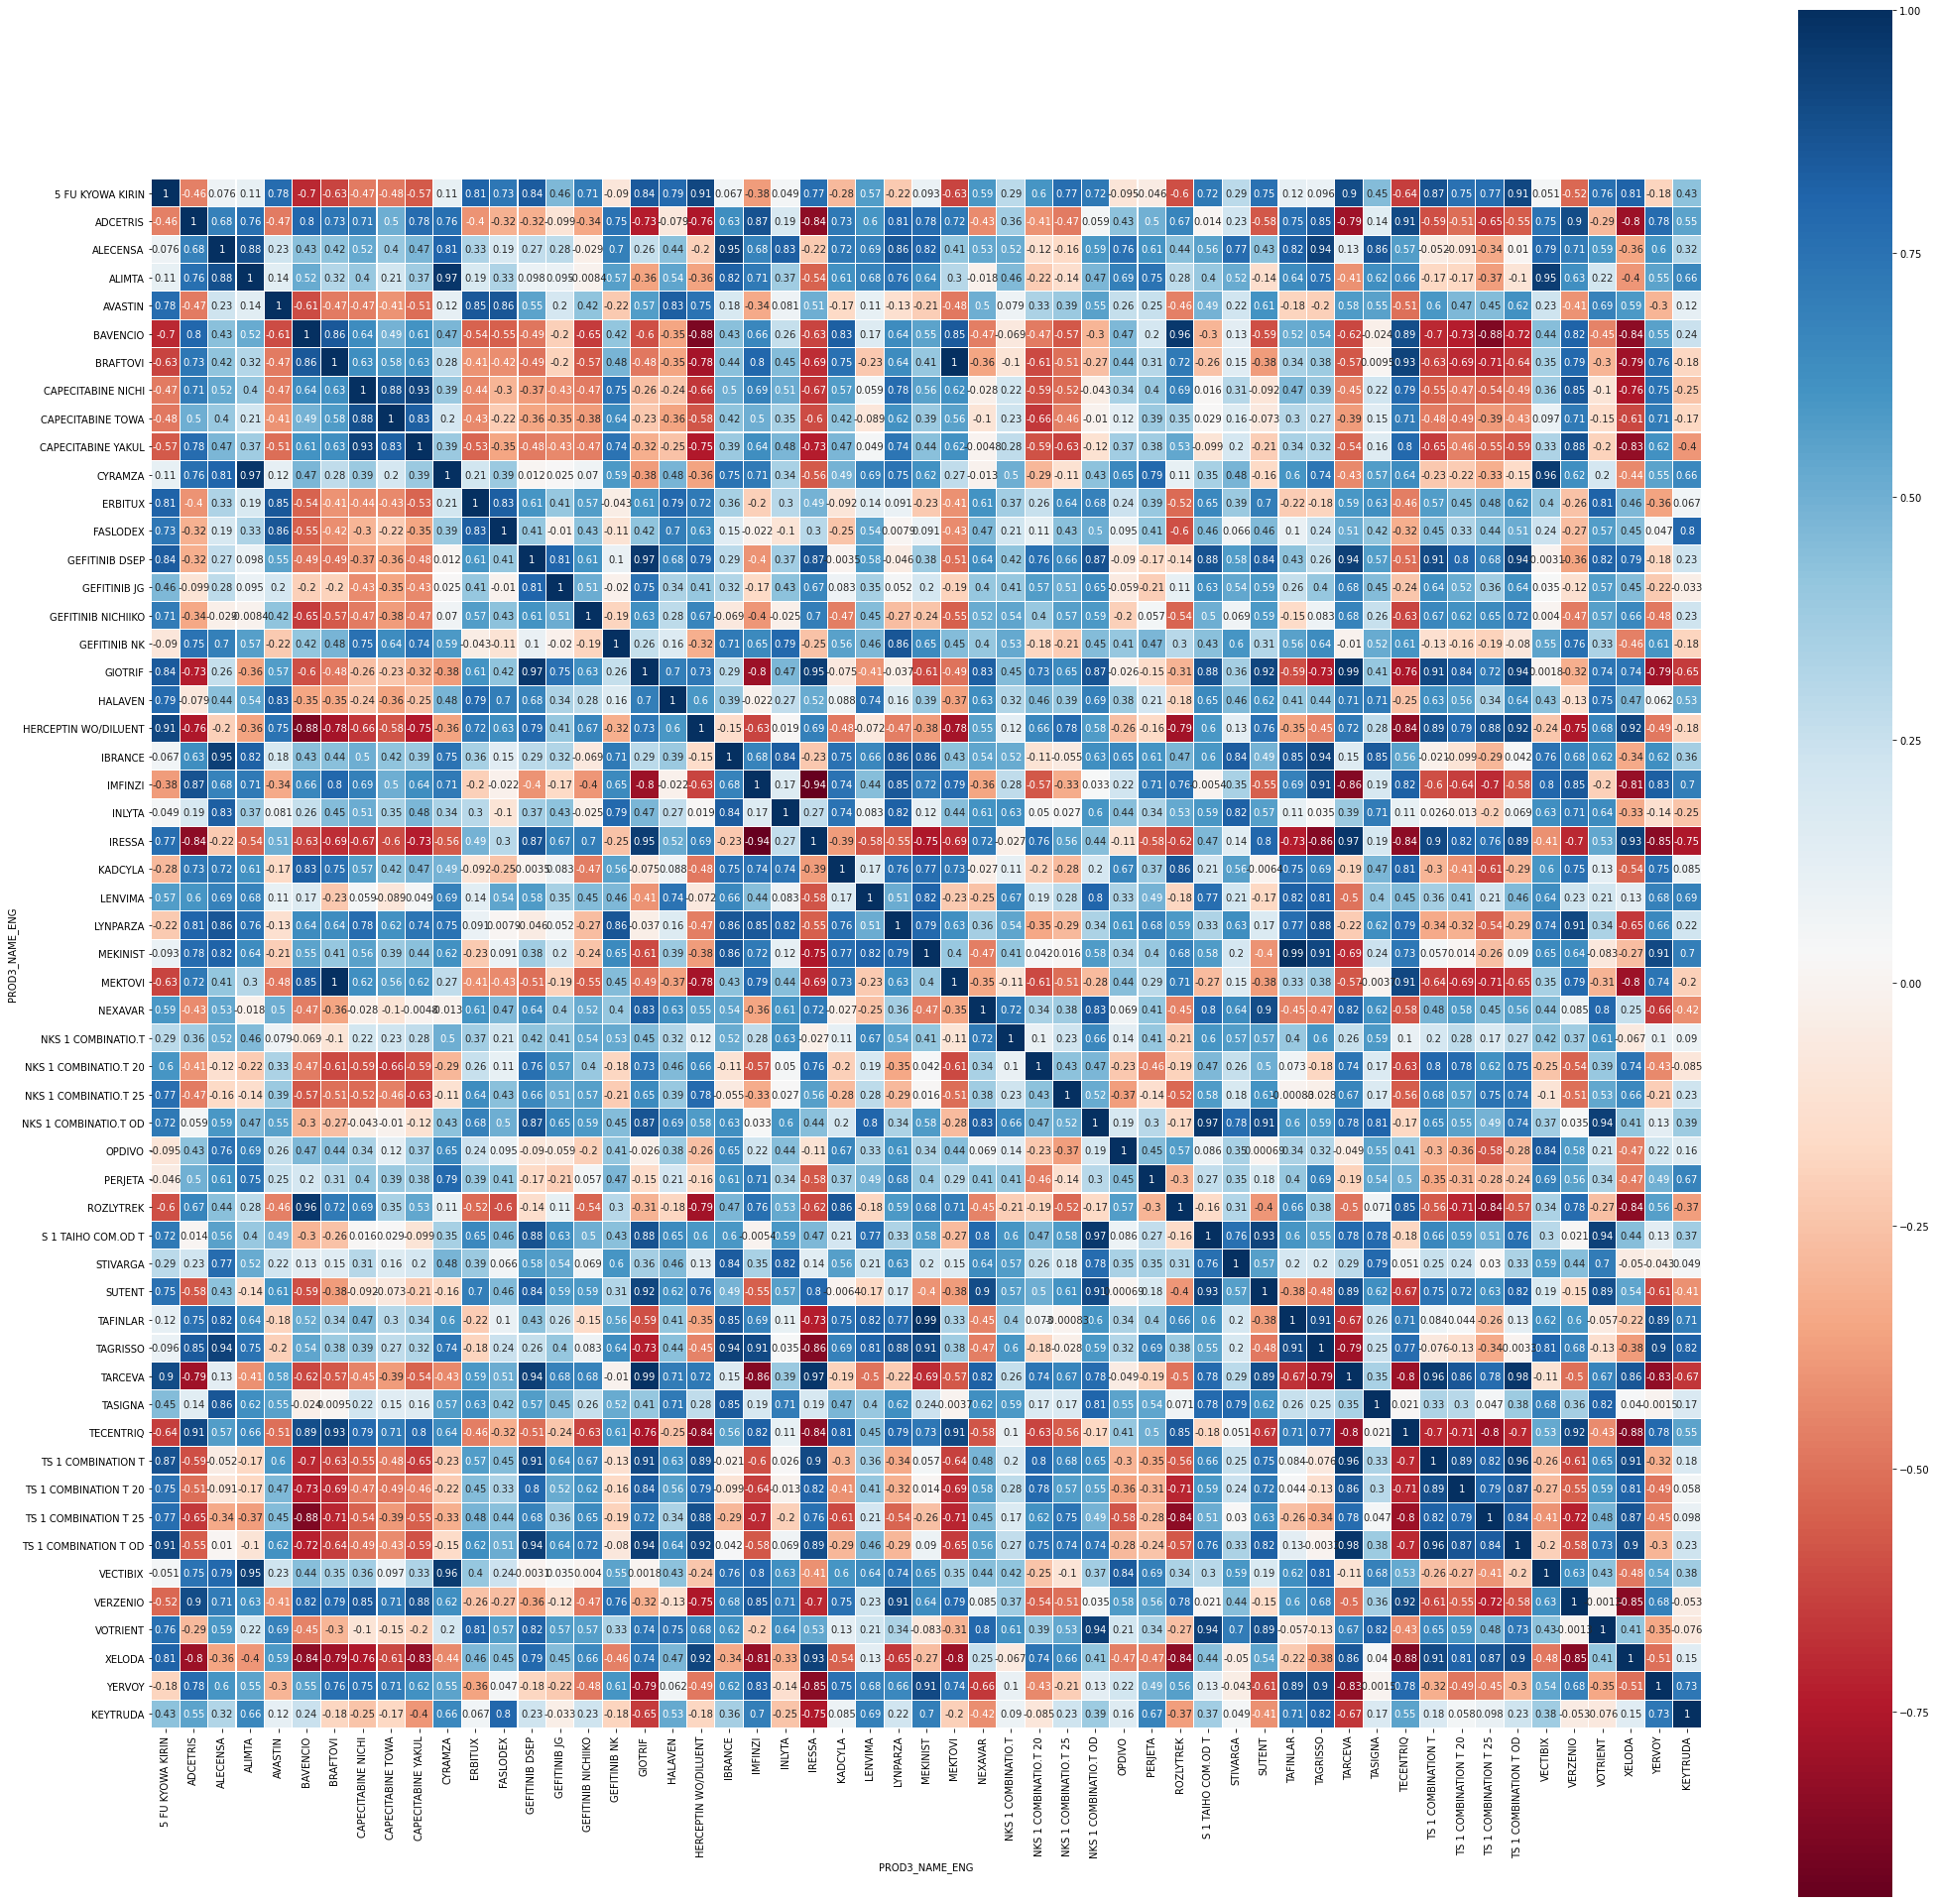

In [144]:
colormap = plt.cm.RdBu
plt.figure(figsize=(35,35))
sns.heatmap(df_DDD_YM_competitor_sales_final[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [145]:
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp = df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left')
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp

YM  NHI National Health Insurance (JPY)      QTY  Pembrolizumab_KHN  \
0   201702                         4.701825e+07    114.4                NaN   
1   201703                         6.221503e+08   1515.4                NaN   
2   201704                         1.489506e+09   3627.0                0.0   
3   201705                         2.063888e+09   5026.6                0.0   
4   201706                         2.680972e+09   6529.2                0.0   
5   201707                         3.006884e+09   7322.2                0.0   
6   201708                         3.609877e+09   8791.4                0.0   
7   201709                         3.422387e+09   8333.8                0.0   
8   201710                         4.096516e+09   9975.8                0.0   
9   201711                         4.313293e+09  10504.0                0.0   
10  201712                         4.596108e+09  11191.2                0.0   
11  201801                         4.582076e+09  11159.6                0.0   
12  201802                         5.265153e+09  12822.4                0.0   
13  201803                         5.300156e+09  12908.0                0.0   
14  201804                         6.365644e+09  17452.8                0.0   
15  201805                         6.149319e+09  16860.8                0.0   
16  201806                         6.325430e+09  17346.0                0.0   
17  201807                         6.458562e+09  17711.0                0.0   
18  201808                         7.212310e+09  19778.6                0.0   
19  201809                         6.112720e+09  16761.8                0.0   
20  201810                         7.553954e+09  20716.2                0.0   
21  201811                         7.277188e+09  19955.2                0.0   
22  201812                         7.563163e+09  20743.4                0.0   
23  201901                         8.041951e+09  22055.0                0.0   
24  201902                         8.206546e+09  22508.4                0.0   
25  201903                         7.894259e+09  21651.8                0.0   
26  201904                         1.109745e+10  30437.6                0.0   
27  201905                         9.492570e+09  26035.4                0.0   
28  201906                         1.010361e+10  27711.4                0.0   
29  201907                         1.103529e+10  30266.8                0.0   
30  201908                         1.176022e+10  32255.0                0.0   
31  201909                         1.356832e+10  37214.0                0.0   
32  201910                         1.038560e+10  27967.0                0.0   
33  201911                         1.085716e+10  29237.0                0.0   
34  201912                         1.224190e+10  32966.0               13.0   
35  202001                         1.090842e+10  29375.0               22.0   
36  202002                         1.059100e+10  34585.0               37.0   
37  202003                         9.671388e+09  31582.0               47.0   
38  202004                         1.011206e+10  41724.0               61.0   
39  202005                         7.433517e+09  30672.0               70.0   
40  202006                         9.522125e+09  39290.0               89.0   
41  202007                         9.392955e+09  38757.0               79.0   
42  202008                         9.150114e+09  37755.0               84.0   
43  202009                         9.216514e+09  38029.0               88.0   
44  202010                         1.049494e+10  43304.0               96.0   
45  202011                         9.256757e+09  38195.0               97.0   
46  202012                         1.031464e+10  42560.0                NaN   
47  202101                         9.950361e+09  41057.0                NaN   
48  202102                         6.073887e+09  25062.0                NaN   

    Pembrolizumab_KLC  Pembrolizumab_KML  Pembrolizumab_K

<AxesSubplot:>

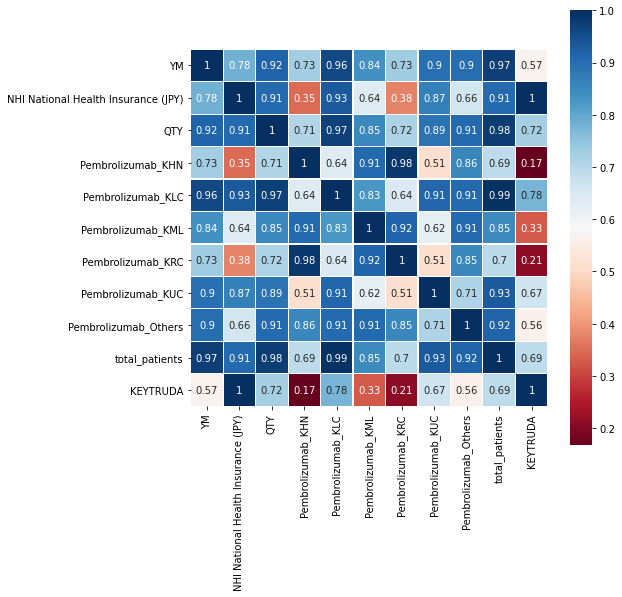

In [146]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left').corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [147]:
df_DDD_YM_competitor_sales_final

PROD3_NAME_ENG      YM  5 FU KYOWA KIRIN      ADCETRIS     AFINITOR  \
0               201804               NaN  3.907231e+08          NaN   
1               201805               NaN  3.688352e+08          NaN   
2               201806               NaN  3.693009e+08          NaN   
3               201807               NaN  3.842033e+08          NaN   
4               201808               NaN  3.967773e+08          NaN   
5               201809               NaN  3.697666e+08          NaN   
6               201810               NaN  4.498672e+08          NaN   
7               201811               NaN  4.903832e+08          NaN   
8               201812               NaN  5.690866e+08          NaN   
9               201901               NaN  5.406789e+08          NaN   
10              201902        63383355.0  5.760721e+08  527581926.0   
11              201903        61841055.0  5.499929e+08  498799538.0   
12              201904        77728203.0  7.246308e+08  786076738.0   
13              201905        59841254.0  6.156567e+08  579830906.0   
14              201906        63925055.0  5.933031e+08  588542778.0   
15              201907        69475863.0  6.780607e+08  658145041.0   
16              201908        65411932.0  6.687466e+08  630315772.0   
17              201909        61796126.0  6.706094e+08  686939611.0   
18              201910        68520537.0  7.257172e+08  720394006.0   
19              201911        60883149.0  6.265833e+08  643554974.0   
20              201912        66944290.0  7.157564e+08  678796904.0   
21              202001        57281198.0  6.967834e+08  672088580.0   
22              202002        55121577.0  7.850079e+08  596265442.0   
23              202003        56872804.0  8.779756e+08  586249802.0   
24              202004        64521201.0  1.144072e+09  942266387.0   
25              202005        47837690.0  8.608999e+08  592495123.0   
26              202006        56473890.0  1.062962e+09  627789651.0   
27              202007        60045162.0  1.105177e+09  686647096.0   
28              202008        51852343.0  9.951338e+08  646922087.0   
29              202009        52789204.0  9.747379e+08  618303303.0   
30              202010        54715266.0  1.006043e+09  755448046.0   
31              202011        50685969.0  8.836675e+08  632308504.0   
32              202012        54218391.0  1.048733e+09  758842908.0   
33              202101        48404518.0  9.154472e+08  641221055.0   

PROD3_NAME_ENG      ALECENSA        ALIMTA       AVASTIN     BAVENCIO  \
0                        NaN  2.954290e+09  8.825386e+09   11568540.0   
1                        NaN  2.635835e+09  8.185535e+09   13303821.0   
2                        NaN  2.598338e+09  8.366398e+09   13496630.0   
3                        NaN  2.686894e+09  8.139625e+09   21787417.0   
4                        NaN  2.821622e+09  8.927263e+09   25836406.0   
5                        NaN  2.403802e+09  7.622200e+09   22365844.0   
6                        NaN  2.857378e+09  8.926395e+09   27378878.0   
7                        NaN  2.697869e+09  8.514361e+09   28921350.0   
8                        NaN  2.720625e+09  8.549084e+09   22944271.0   
9                        NaN  2.505321e+09  7.565245e+09   24486743.0   
10              1.521076e+09  2.589973e+09  7.720502e+09   20244945.0   
11              1.528299e+09  2.533738e+09  7.573249e+09   26800451.0   
12              2.113427e+09  3.483980e+09  9.629146e+09   25836406.0   
13              1.773718e+09  2.608216e+09  7.506022e+09   29499777.0   
14              1.600994e+09  2.805248e+09  8.165891e+09   27764496.0   
15              1.853247e+09  3.133337e+09  8.562695e+09   39140227.0   
16              1.804241e+09  3.094189e+09  8.516776e+09   35284047.0   
17              1.941369e+09  3.607701e+09  9.881653e+09   30656631.0   
18              1.726453e+09  2.852038e+09  7.199704e+09   39657650.0   
19              1.737941e+09  2.959302e+09  7.760939e+

In [148]:
### overlapping correlations - 

In [149]:
#### 

#### Final Data Preparation

In [150]:
df_inhouse_sales_by_account

Ins_Code PROD_NAME_ENG      YM  NHI National Health Insurance (JPY)  \
0        1000001      Keytruda  201709                             821082.0   
1        1000001      Keytruda  201710                             821082.0   
2        1000001      Keytruda  201711                            2137193.0   
3        1000001      Keytruda  201712                            2137193.0   
4        1000001      Keytruda  201801                            2958275.0   
...          ...           ...     ...                                  ...   
145900   2026683      Lynparza  202010                             290366.0   
145901   2026683      Lynparza  202011                            1843000.0   
145902   2026683      Lynparza  202012                            2619317.0   
145903   2026683      Lynparza  202101                            2524536.0   
145904   2026683      Lynparza  202102                             580731.0   

        QTY  
0       2.0  
1       2.0  
2       5.2  
3       5.2  
4       7.2  
...     ...  
145900  1.0  
145901  6.3  
145902  9.0  
145903  8.7  
145904  2.0  

[78219 rows x 5 columns]

In [151]:
df_inhouse_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].pivot_table(
        index=['Ins_Code', 'YM'], 
         columns='PROD_NAME_ENG', 
         values=['QTY','NHI National Health Insurance (JPY)']
).reset_index()

df_inhouse_sales.columns = list(map("_".join, df_inhouse_sales.columns))
df_inhouse_sales.rename(columns={'Ins_Code_':'Ins_Code','YM_':'YM'},inplace=True)

In [152]:
df_inhouse_sales.isnull().sum()

Ins_Code                                        0
YM                                              0
NHI National Health Insurance (JPY)_Keytruda    0
QTY_Keytruda                                    0
dtype: int64

In [153]:
df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab']

Launch_month           Drug Indication
69        201702  Pembrolizumab        KML
70        201702  Pembrolizumab        KLC
71        201711  Pembrolizumab    Hodgkin
72        201712  Pembrolizumab        KUC
73        201812  Pembrolizumab      MSI-H
74        201912  Pembrolizumab        KRC
75        201912  Pembrolizumab        KHN

In [154]:
keytruda_indication_launch_dict = dict(zip(df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Indication, 
                     df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Launch_month))
keytruda_indication_launch_dict

{'KML': 201702,
 'KLC': 201702,
 'Hodgkin': 201711,
 'KUC': 201712,
 'MSI-H': 201812,
 'KRC': 201912,
 'KHN': 201912}

In [155]:
df_trgt.head()

Ins_Code HP_GP_TYPE (english)                 Ins_Type (english)  \
0    1000001                   HP         Major Hospital (>500 beds)   
9    1000011                   HP  Mid-sized Hospital (200~499 Beds)   
17   1000021                   HP                University Hospital   
24   1000031                   HP         Major Hospital (>500 beds)   
33   1000040                   HP  Mid-sized Hospital (200~499 Beds)   

    Pref_Code  City_Code  Jis_City_Code  Zip_Code  KLC_DIA  KUC_DIA  KRC_DIA  \
0           1       1101           1101  600011.0      8.0      2.0      3.0   
9           1       1101           1101  600004.0     10.0      9.0      7.0   
17          1       1101           1101  600061.0      6.0      3.0      3.0   
24          1       1101           1101  600033.0      8.0      6.0      5.0   
33          1       1101           1101  600061.0      8.0      8.0      9.0   

    KHN_DIA  KES_DIA  LYNPA_DIA  KML_DIA  KLC_TGT  KUC_TGT  KRC_TGT  KHN_TGT  \
0       8.0     10.0        8.0     11.0      1.0      1.0      1.0      1.0   
9      10.0      7.0        4.0     11.0      1.0      1.0      1.0      NaN   
17      3.0      7.0        3.0      8.0      1.0      1.0      1.0      1.0   
24      NaN     10.0        3.0     11.0      1.0      1.0      1.0      NaN   
33      NaN     10.0        9.0     11.0      1.0      1.0      1.0      NaN   

    KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  PAT_TGT  LYO_TGT  LYNPA_TGT  \
0       1.0      1.0      1.0      NaN     1.0      1.0      1.0        1.0   
9       NaN      NaN      1.0      1.0     NaN      NaN      NaN        1.0   
17      1.0      1.0      1.0      1.0     1.0      1.0      1.0        1.0   
24      NaN      NaN      1.0      NaN     NaN      1.0      1.0        1.0   
33      NaN      NaN      1.0      NaN     NaN      1.0      1.0        NaN   

    LEN_TGT  
0       1.0  
9       NaN  
17      1.0  
24      1.0  
33      NaN

In [156]:
df_inhouse_sales['KML_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],1,0)
df_inhouse_sales['KLC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],1,0)
df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
df_inhouse_sales['KUC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],1,0)
df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)
df_inhouse_sales['KRC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],1,0)
df_inhouse_sales['KHN_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],1,0)

In [157]:
df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','KLC_TGT','KUC_TGT','KRC_TGT','KHN_TGT','KML_TGT',
                                                  'KHL_TGT','KMS_TGT','KES_TGT','KX_TGT']].fillna(0),
                      on='Ins_Code',how='left')

In [158]:
df_inhouse_sales = df_inhouse_sales.sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
...        ...      ...      ...      ...      ...      ...      ...     ...  
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  

[37774 rows x 20 columns]

In [159]:
# df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','HP_GP_TYPE (english)']], on='Ins_Code',how='left')
# df_inhouse_sales

In [160]:
df_inhouse_sales['YM'].min(),df_inhouse_sales['YM'].max()

(201702, 202102)

In [161]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0  
...        ...      ...      ...      ...      ...      ...      ...     ...  
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0  
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0  

[37774 rows x 20 columns]

In [162]:
df_inhouse_sales['Keytruda_KML_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],np.nan,0)
df_inhouse_sales['Keytruda_KLC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],np.nan,0)
df_inhouse_sales['Keytruda_KUC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],np.nan,0)
df_inhouse_sales['Keytruda_KRC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],np.nan,0)
df_inhouse_sales['Keytruda_KHN_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],np.nan,0)
df_inhouse_sales['Keytruda_Others_QTY'] = np.nan

# df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
# df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)

In [163]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

(37774, 26)


Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [164]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [165]:
## generating target variables for KML
filter_for_kml_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

23032    2.0
32699    2.0
32700    2.0
32701    0.0
32702    4.0
32703    2.0
32704    0.0
Name: Keytruda_KML_QTY, dtype: float64

23032    2.0
32699    2.0
32700    2.0
32701    0.0
32702    4.0
32703    2.0
32704    0.0
Name: QTY_Keytruda, dtype: float64

In [166]:
## generating target variables for KLC
filter_for_klc_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37324     6.0
37325     6.0
37326     4.0
37327     4.0
37328     6.0
Name: Keytruda_KLC_QTY, Length: 598, dtype: float64

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37324     6.0
37325     6.0
37326     4.0
37327     4.0
37328     6.0
Name: QTY_Keytruda, Length: 598, dtype: float64

In [167]:
df_inhouse_sales.isnull().sum()

Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [168]:
## generating target variables for KUC
filter_for_kuc_sales = (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37202     6.0
37203    12.0
37204    14.0
37205     4.0
37206     4.0
Name: Keytruda_KUC_QTY, Length: 126, dtype: float64

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37202     6.0
37203    12.0
37204    14.0
37205     4.0
37206     4.0
Name: QTY_Keytruda, Length: 126, dtype: float64

In [169]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [170]:
## generating target variables for KRC
filter_for_krc_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

2634     0.0
2635     4.0
2636     0.0
2637     4.0
2638     2.0
2639     2.0
2640     0.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: Keytruda_KRC_QTY, dtype: float64

2634     0.0
2635     4.0
2636     0.0
2637     4.0
2638     2.0
2639     2.0
2640     0.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: QTY_Keytruda, dtype: float64

In [171]:
## generating target variables for KHN
filter_for_khn_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

Series([], Name: Keytruda_KHN_QTY, dtype: float64)

Series([], Name: QTY_Keytruda, dtype: float64)

In [172]:
### Filling based on only Target Flags

In [173]:
## generating target variables for KML again
filter_for_kml_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

32699    2.0
32700    2.0
32702    4.0
32703    2.0
32705    2.0
32706    0.0
32707    0.0
32708    2.0
32709    2.0
32710    2.0
32711    2.0
32712    4.0
32713    2.0
32714    2.0
32715    8.0
32716    4.0
32717    4.0
32718    4.0
32719    0.0
32720    2.0
32721    2.0
32722    4.0
32723    2.0
32724    2.0
32725    4.0
32726    2.0
32727    2.0
32728    0.0
Name: Keytruda_KML_QTY, dtype: float64

32699    2.0
32700    2.0
32702    4.0
32703    2.0
32705    2.0
32706    0.0
32707    0.0
32708    2.0
32709    2.0
32710    2.0
32711    2.0
32712    4.0
32713    2.0
32714    2.0
32715    8.0
32716    4.0
32717    4.0
32718    4.0
32719    0.0
32720    2.0
32721    2.0
32722    4.0
32723    2.0
32724    2.0
32725    4.0
32726    2.0
32727    2.0
32728    0.0
Name: QTY_Keytruda, dtype: float64

In [174]:
## generating target variables for KLC again
filter_for_klc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37364    18.0
37365    20.0
37366    12.0
37367    20.0
37368     8.0
Name: Keytruda_KLC_QTY, Length: 3417, dtype: float64

316       4.0
317      10.0
318       8.0
319       6.0
320       8.0
         ... 
37364    18.0
37365    20.0
37366    12.0
37367    20.0
37368     8.0
Name: QTY_Keytruda, Length: 3417, dtype: float64

In [175]:
## generating target variables for KUC again
filter_for_kuc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37229    10.0
37230    12.0
37231     8.0
37232     4.0
37233     4.0
Name: Keytruda_KUC_QTY, Length: 318, dtype: float64

2241      4.0
2242      6.0
2243      2.0
2244      6.0
2245      6.0
         ... 
37229    10.0
37230    12.0
37231     8.0
37232     4.0
37233     4.0
Name: QTY_Keytruda, Length: 318, dtype: float64

In [176]:
## generating target variables for KRC again
filter_for_krc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KRC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

2635     4.0
2637     4.0
2638     2.0
2639     2.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: Keytruda_KRC_QTY, dtype: float64

2635     4.0
2637     4.0
2638     2.0
2639     2.0
2641     2.0
2642     6.0
2643     6.0
2644     8.0
2645     2.0
18017    6.0
18018    2.0
18019    4.0
18020    4.0
18021    4.0
18022    4.0
18023    4.0
18024    2.0
18025    2.0
18026    2.0
18027    4.0
18028    4.0
18029    2.0
18982    4.0
18983    2.0
18984    2.0
18985    2.0
18986    2.0
18987    2.0
18988    2.0
18989    2.0
18990    2.0
Name: QTY_Keytruda, dtype: float64

In [177]:
## generating target variables for KHN again
filter_for_khn_sales = (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KHN_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

Series([], Name: Keytruda_KHN_QTY, dtype: float64)

Series([], Name: QTY_Keytruda, dtype: float64)

In [178]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [179]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

(37774, 26)


Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [180]:
# ### initial number:

# Keytruda_KML_QTY                                37774
# Keytruda_KLC_QTY                                37774
# Keytruda_KUC_QTY                                32463
# Keytruda_KRC_QTY                                13138
# Keytruda_KHN_QTY                                13138

In [181]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
316     1000080  201704                                     1642164.0   
317     1000080  201705                                     4105410.0   
318     1000080  201706                                     3284328.0   
319     1000080  201707                                     2463246.0   
320     1000080  201708                                     3284328.0   
...         ...     ...                                           ...   
37364   1551120  202010                                     4362390.0   
37365   1551120  202011                                     4847100.0   
37366   1551120  202012                                     2908260.0   
37367   1551120  202101                                     4847100.0   
37368   1551120  202102                                     1938840.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
316             4.0             1             1                 0   
317            10.0             1             1                 0   
318             8.0             1             1                 0   
319             6.0             1             1                 0   
320             8.0             1             1                 0   
...             ...           ...           ...               ...   
37364          18.0             1             1                 1   
37365          20.0             1             1                 1   
37366          12.0             1             1                 1   
37367          20.0             1             1                 1   
37368           8.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
316               0             0             0             0      1.0   
317               0             0             0             0      1.0   
318               0             0             0             0      1.0   
319               0             0             0             0      1.0   
320               0             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37364             1             1             1             1      1.0   
37365             1             1             1             1      1.0   
37366             1             1             1             1      1.0   
37367             1             1             1             1      1.0   
37368             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
316        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
317        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
318        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
319        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
320        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37364      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37365      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37366      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37367      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
37368      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
316                 NaN               4.0               0.0               0.0   
317                 NaN              10.0               0.0               0.0   
318                 NaN               8.0               0.0               0.0   
319                 NaN               6.0               0.0               0.0   
320                 NaN               8.0     

In [182]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]['Ins_Code'].nunique()

113

In [183]:
### added today:
## generating target variables for KML again
filter_for_kml_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'])

42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
        ... 
37761    0.0
37762    0.0
37763    0.0
37772    0.0
37773    0.0
Name: Keytruda_KML_QTY, Length: 31344, dtype: float64

In [184]:
## generating target variables for KLC again
filter_for_klc_0_tgt = (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'])

804      0.0
805      0.0
806      0.0
885      0.0
886      0.0
        ... 
37671    0.0
37672    0.0
37673    0.0
37674    0.0
37675    0.0
Name: Keytruda_KLC_QTY, Length: 3850, dtype: float64

In [185]:
## generating target variables for KUC again
filter_for_kuc_0_tgt = (df_inhouse_sales['KUC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'])

233      0.0
234      0.0
235      0.0
236      0.0
237      0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KUC_QTY, Length: 9095, dtype: float64

In [186]:
## generating target variables for KRC again
filter_for_krc_0_tgt = (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'])

253      0.0
254      0.0
255      0.0
256      0.0
257      0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KRC_QTY, Length: 5304, dtype: float64

In [187]:
## generating target variables for KHN again
filter_for_khn_0_tgt = (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'])

69       0.0
70       0.0
71       0.0
72       0.0
73       0.0
        ... 
37759    0.0
37760    0.0
37761    0.0
37762    0.0
37763    0.0
Name: Keytruda_KHN_QTY, Length: 8196, dtype: float64

In [188]:
## generating target variables for Others 

In [189]:
filter_for_others_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                        (df_inhouse_sales['KLC_TGT']==0) & \
                        (df_inhouse_sales['KUC_TGT']==0) & \
                        (df_inhouse_sales['KRC_TGT']==0) & \
                        (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'])

804       2.0
805       2.0
806       2.0
1647      2.0
1648      2.0
         ... 
37499    20.0
37500    12.0
37501    12.0
37502    16.0
37503    14.0
Name: Keytruda_Others_QTY, Length: 956, dtype: float64

In [190]:
filter_for_others_1_tgt = (df_inhouse_sales['KHL_TGT']==0) & \
                        (df_inhouse_sales['KMS_TGT']==0) & \
                        (df_inhouse_sales['KES_TGT']==0) & \
                        (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'])

316      0.0
317      0.0
318      0.0
319      0.0
320      0.0
        ... 
37364    0.0
37365    0.0
37366    0.0
37367    0.0
37368    0.0
Name: Keytruda_Others_QTY, Length: 5739, dtype: float64

In [191]:
df_inhouse_sales.isnull().sum()

Ins_Code                                            0
YM                                                  0
NHI National Health Insurance (JPY)_Keytruda        0
QTY_Keytruda                                        0
KML_launched                                        0
KLC_launched                                        0
Hodgkin_launched                                    0
KUC_launched                                        0
MSI_launched                                        0
KRC_launched                                        0
KHN_launched                                        0
KLC_TGT                                             0
KUC_TGT                                             0
KRC_TGT                                             0
KHN_TGT                                             0
KML_TGT                                             0
KHL_TGT                                             0
KMS_TGT                                             0
KES_TGT                     

In [192]:
# ## numbers before today
# Keytruda_KML_QTY                                37743
# Keytruda_KLC_QTY                                34161
# Keytruda_KUC_QTY                                32074
# Keytruda_KRC_QTY                                13104
# Keytruda_KHN_QTY                                13138
# Keytruda_Others_QTY                             37774

### Preparing Data for Optimization

In [193]:
df_inhouse_sales

Ins_Code      YM  NHI National Health Insurance (JPY)_Keytruda  \
0       1000001  201709                                      821082.0   
1       1000001  201710                                      821082.0   
2       1000001  201711                                     2137193.0   
3       1000001  201712                                     2137193.0   
4       1000001  201801                                     2958275.0   
...         ...     ...                                           ...   
37769   2024478  202012                                     4847100.0   
37770   2024478  202101                                     4362390.0   
37771   2024478  202102                                     4362390.0   
37772   2026683  202101                                    16964850.0   
37773   2026683  202102                                    12117750.0   

       QTY_Keytruda  KML_launched  KLC_launched  Hodgkin_launched  \
0               2.0             1             1                 0   
1               2.0             1             1                 0   
2               5.2             1             1                 1   
3               5.2             1             1                 1   
4               7.2             1             1                 1   
...             ...           ...           ...               ...   
37769          20.0             1             1                 1   
37770          18.0             1             1                 1   
37771          18.0             1             1                 1   
37772          70.0             1             1                 1   
37773          50.0             1             1                 1   

       KUC_launched  MSI_launched  KRC_launched  KHN_launched  KLC_TGT  \
0                 0             0             0             0      1.0   
1                 0             0             0             0      1.0   
2                 0             0             0             0      1.0   
3                 1             0             0             0      1.0   
4                 1             0             0             0      1.0   
...             ...           ...           ...           ...      ...   
37769             1             1             1             1      1.0   
37770             1             1             1             1      1.0   
37771             1             1             1             1      1.0   
37772             1             1             1             1      1.0   
37773             1             1             1             1      1.0   

       KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  KMS_TGT  KES_TGT  KX_TGT  \
0          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
1          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
3          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
4          1.0      1.0      1.0      1.0      1.0      1.0      0.0     1.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
37769      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37770      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37771      1.0      1.0      1.0      1.0      0.0      1.0      1.0     1.0   
37772      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   
37773      1.0      1.0      1.0      0.0      1.0      1.0      1.0     1.0   

       Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  Keytruda_KRC_QTY  \
0                   NaN               NaN               0.0               0.0   
1                   NaN               NaN               0.0               0.0   
2                   NaN               NaN               0.0               0.0   
3                   NaN               NaN               NaN               0.0   
4                   NaN               NaN     

In [194]:
df_inhouse_sales.columns

Index(['Ins_Code', 'YM', 'NHI National Health Insurance (JPY)_Keytruda',
       'QTY_Keytruda', 'KML_launched', 'KLC_launched', 'Hodgkin_launched',
       'KUC_launched', 'MSI_launched', 'KRC_launched', 'KHN_launched',
       'KLC_TGT', 'KUC_TGT', 'KRC_TGT', 'KHN_TGT', 'KML_TGT', 'KHL_TGT',
       'KMS_TGT', 'KES_TGT', 'KX_TGT', 'Keytruda_KML_QTY', 'Keytruda_KLC_QTY',
       'Keytruda_KUC_QTY', 'Keytruda_KRC_QTY', 'Keytruda_KHN_QTY',
       'Keytruda_Others_QTY'],
      dtype='object')

In [195]:
df_inhouse_sales.rename(columns={'NHI National Health Insurance (JPY)_Keytruda':'inhouse_keytruda_sales_YEN', 'QTY_Keytruda':'inhouse_keytruda_sales_QTY'},inplace=True)

In [196]:
df_inhouse_sales

Ins_Code      YM  inhouse_keytruda_sales_YEN  \
0       1000001  201709                    821082.0   
1       1000001  201710                    821082.0   
2       1000001  201711                   2137193.0   
3       1000001  201712                   2137193.0   
4       1000001  201801                   2958275.0   
...         ...     ...                         ...   
37769   2024478  202012                   4847100.0   
37770   2024478  202101                   4362390.0   
37771   2024478  202102                   4362390.0   
37772   2026683  202101                  16964850.0   
37773   2026683  202102                  12117750.0   

       inhouse_keytruda_sales_QTY  KML_launched  KLC_launched  \
0                             2.0             1             1   
1                             2.0             1             1   
2                             5.2             1             1   
3                             5.2             1             1   
4                             7.2             1             1   
...                           ...           ...           ...   
37769                        20.0             1             1   
37770                        18.0             1             1   
37771                        18.0             1             1   
37772                        70.0             1             1   
37773                        50.0             1             1   

       Hodgkin_launched  KUC_launched  MSI_launched  KRC_launched  \
0                     0             0             0             0   
1                     0             0             0             0   
2                     1             0             0             0   
3                     1             1             0             0   
4                     1             1             0             0   
...                 ...           ...           ...           ...   
37769                 1             1             1             1   
37770                 1             1             1             1   
37771                 1             1             1             1   
37772                 1             1             1             1   
37773                 1             1             1             1   

       KHN_launched  KLC_TGT  KUC_TGT  KRC_TGT  KHN_TGT  KML_TGT  KHL_TGT  \
0                 0      1.0      1.0      1.0      1.0      1.0      1.0   
1                 0      1.0      1.0      1.0      1.0      1.0      1.0   
2                 0      1.0      1.0      1.0      1.0      1.0      1.0   
3                 0      1.0      1.0      1.0      1.0      1.0      1.0   
4                 0      1.0      1.0      1.0      1.0      1.0      1.0   
...             ...      ...      ...      ...      ...      ...      ...   
37769             1      1.0      1.0      1.0      1.0      1.0      0.0   
37770             1      1.0      1.0      1.0      1.0      1.0      0.0   
37771             1      1.0      1.0      1.0      1.0      1.0      0.0   
37772             1      1.0      1.0      1.0      1.0      0.0      1.0   
37773             1      1.0      1.0      1.0      1.0      0.0      1.0   

       KMS_TGT  KES_TGT  KX_TGT  Keytruda_KML_QTY  Keytruda_KLC_QTY  \
0          1.0      0.0     1.0               NaN               NaN   
1          1.0      0.0     1.0               NaN               NaN   
2          1.0      0.0     1.0               NaN               NaN   
3          1.0      0.0     1.0               NaN               NaN   
4          1.0      0.0     1.0               NaN               NaN   
...        ...      ...     ...               ...               ...   
37769      1.0      1.0     1.0               NaN               NaN   
37770      1.0      1.0     1.0               NaN               NaN   
37771      1.0      1.0     1.0               NaN               NaN   
37772      1.0      1.0     1.0               0.0               NaN   
37773      1.0      1.0     1.

In [197]:
df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY','Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']]

Ins_Code      YM  Keytruda_KML_QTY  Keytruda_KLC_QTY  Keytruda_KUC_QTY  \
0       1000001  201709               NaN               NaN               0.0   
1       1000001  201710               NaN               NaN               0.0   
2       1000001  201711               NaN               NaN               0.0   
3       1000001  201712               NaN               NaN               NaN   
4       1000001  201801               NaN               NaN               NaN   
...         ...     ...               ...               ...               ...   
37769   2024478  202012               NaN               NaN               NaN   
37770   2024478  202101               NaN               NaN               NaN   
37771   2024478  202102               NaN               NaN               NaN   
37772   2026683  202101               0.0               NaN               NaN   
37773   2026683  202102               0.0               NaN               NaN   

       Keytruda_KRC_QTY  Keytruda_KHN_QTY  Keytruda_Others_QTY  
0                   0.0               0.0                  NaN  
1                   0.0               0.0                  NaN  
2                   0.0               0.0                  NaN  
3                   0.0               0.0                  NaN  
4                   0.0               0.0                  NaN  
...                 ...               ...                  ...  
37769               NaN               NaN                  NaN  
37770               NaN               NaN                  NaN  
37771               NaN               NaN                  NaN  
37772               NaN               NaN                  NaN  
37773               NaN               NaN                  NaN  

[37774 rows x 8 columns]

In [198]:
df_optimization = pd.melt(df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY',
                          'Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']],
        id_vars=['Ins_Code', 'YM'], var_name='Indication', value_name='value').sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_optimization

Ins_Code      YM           Indication  value
0        1000001  201709     Keytruda_KML_QTY    NaN
1        1000001  201709     Keytruda_KLC_QTY    NaN
2        1000001  201709     Keytruda_KUC_QTY    0.0
3        1000001  201709     Keytruda_KRC_QTY    0.0
4        1000001  201709     Keytruda_KHN_QTY    0.0
...          ...     ...                  ...    ...
226639   2026683  202102     Keytruda_KLC_QTY    NaN
226640   2026683  202102     Keytruda_KUC_QTY    NaN
226641   2026683  202102     Keytruda_KRC_QTY    NaN
226642   2026683  202102     Keytruda_KHN_QTY    NaN
226643   2026683  202102  Keytruda_Others_QTY    NaN

[226644 rows x 4 columns]

In [199]:
df_optimization[df_optimization['Indication']=='Keytruda_KML_QTY'].isnull().sum()

Ins_Code         0
YM               0
Indication       0
value         6399
dtype: int64

In [200]:
df_optimization.isnull().sum()

Ins_Code           0
YM                 0
Indication         0
value         103510
dtype: int64

In [201]:
df_optimization1 = df_optimization.merge(df_inhouse_sales[['Ins_Code','YM','inhouse_keytruda_sales_YEN','inhouse_keytruda_sales_QTY']],
                      on = ['Ins_Code','YM'], how='left')
df_optimization1

Ins_Code      YM           Indication  value  \
0        1000001  201709     Keytruda_KML_QTY    NaN   
1        1000001  201709     Keytruda_KLC_QTY    NaN   
2        1000001  201709     Keytruda_KUC_QTY    0.0   
3        1000001  201709     Keytruda_KRC_QTY    0.0   
4        1000001  201709     Keytruda_KHN_QTY    0.0   
...          ...     ...                  ...    ...   
226639   2026683  202102     Keytruda_KLC_QTY    NaN   
226640   2026683  202102     Keytruda_KUC_QTY    NaN   
226641   2026683  202102     Keytruda_KRC_QTY    NaN   
226642   2026683  202102     Keytruda_KHN_QTY    NaN   
226643   2026683  202102  Keytruda_Others_QTY    NaN   

        inhouse_keytruda_sales_YEN  inhouse_keytruda_sales_QTY  
0                         821082.0                         2.0  
1                         821082.0                         2.0  
2                         821082.0                         2.0  
3                         821082.0                         2.0  
4                         821082.0                         2.0  
...                            ...                         ...  
226639                  12117750.0                        50.0  
226640                  12117750.0                        50.0  
226641                  12117750.0                        50.0  
226642                  12117750.0                        50.0  
226643                  12117750.0                        50.0  

[226644 rows x 6 columns]

In [202]:
df_optimization1['Indication'].unique()

array(['Keytruda_KML_QTY', 'Keytruda_KLC_QTY', 'Keytruda_KUC_QTY',
       'Keytruda_KRC_QTY', 'Keytruda_KHN_QTY', 'Keytruda_Others_QTY'],
      dtype=object)

In [203]:
df_optimization1['Indication'] = df_optimization1['Indication'].replace({'Keytruda_KML_QTY':'KML', 'Keytruda_KLC_QTY':'KLC', 'Keytruda_KUC_QTY':'KUC',
       'Keytruda_KRC_QTY':'KRC', 'Keytruda_KHN_QTY':'KHN', 'Keytruda_Others_QTY':'Others'})

In [204]:
df_optimization1['Indication'].unique()

array(['KML', 'KLC', 'KUC', 'KRC', 'KHN', 'Others'], dtype=object)

In [205]:
df_optimization1['is_sales_available_for_indication'] = np.where(df_optimization1['value'].notnull(), 1, 0)

In [206]:
df_optimization1['dummy_var2'] = [1,0,0,0,0,0]*int(df_optimization1.shape[0]/6)
df_optimization1

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
226639   2026683  202102        KLC    NaN                  12117750.0   
226640   2026683  202102        KUC    NaN                  12117750.0   
226641   2026683  202102        KRC    NaN                  12117750.0   
226642   2026683  202102        KHN    NaN                  12117750.0   
226643   2026683  202102     Others    NaN                  12117750.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
226639                        50.0                                  0   
226640                        50.0                                  0   
226641                        50.0                                  0   
226642                        50.0                                  0   
226643                        50.0                                  0   

        dummy_var2  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
226639           0  
226640           0  
226641           0  
226642           0  
226643           0  

[226644 rows x 8 columns]

In [207]:
df_optimization1['YM'].unique()

array([201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 201704, 201705, 201706, 201707, 201708, 201702,
       201703], dtype=int64)

In [208]:
df_optimization1[df_optimization1['YM']==201709]

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0        1000001  201709        KML    NaN                    821082.0   
1        1000001  201709        KLC    NaN                    821082.0   
2        1000001  201709        KUC    0.0                    821082.0   
3        1000001  201709        KRC    0.0                    821082.0   
4        1000001  201709        KHN    0.0                    821082.0   
...          ...     ...        ...    ...                         ...   
226333   1708663  201709        KLC    NaN                   6568656.0   
226334   1708663  201709        KUC    0.0                   6568656.0   
226335   1708663  201709        KRC    0.0                   6568656.0   
226336   1708663  201709        KHN    0.0                   6568656.0   
226337   1708663  201709     Others    NaN                   6568656.0   

        inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                              2.0                                  0   
1                              2.0                                  0   
2                              2.0                                  1   
3                              2.0                                  1   
4                              2.0                                  1   
...                            ...                                ...   
226333                        16.0                                  0   
226334                        16.0                                  1   
226335                        16.0                                  1   
226336                        16.0                                  1   
226337                        16.0                                  0   

        dummy_var2  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
226333           0  
226334           0  
226335           0  
226336           0  
226337           0  

[3984 rows x 8 columns]

### Setting up Scipy

In [213]:
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  dummy_var2  
0                           2.0                                  0           1  
1                           2.0                                  0           0  
2                           2.0                                  1           0  
3                           2.0                                  1           0  
4                           2.0                                  1           0  
..                          ...                                ...         ...  
247                        26.0                                  0           0  
248                        26.0                                  0           0  
249                        26.0                                  0           0  
250                        26.0                                  0           0  
251                        26.0                                  0           0  

[252 rows x 8 columns]

In [214]:
df_DDD[df_DDD.duplicated(['Ins_Code','PROD3_NAME_ENG','YM'])]['PROD3_NAME_ENG'].unique()
df_DDD['Ins_Code'] = df_DDD['Ins_Code'].astype(int)
df_DDD = df_DDD[df_DDD['PROD3_NAME_ENG']!='5 FU KYOWA KIRIN'].reset_index(drop=True)

df_DDD_keytruda_competitors = df_DDD.pivot_table(index=['Ins_Code','YM'],columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']]

PROD3_NAME_ENG  Ins_Code      YM      OPDIVO
0                1000001  201804  10695191.0
1                1000001  201805  15748289.0
2                1000001  201806  15012460.0
3                1000001  201807  14661014.0
4                1000001  201808  13655252.0
...                  ...     ...         ...
31026            2026683  202009  18629550.0
31027            2026683  202010  28151320.0
31028            2026683  202011  21113490.0
31029            2026683  202012  25253390.0
31030            2026683  202101  22769450.0

[31031 rows x 3 columns]

In [215]:
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  dummy_var2  
0                           2.0                                  0           1  
1                           2.0                                  0           0  
2                           2.0                                  1           0  
3                           2.0                                  1           0  
4                           2.0                                  1           0  
..                          ...                                ...         ...  
247                        26.0                                  0           0  
248                        26.0                                  0           0  
249                        26.0                                  0           0  
250                        26.0                                  0           0  
251                        26.0                                  0           0  

[252 rows x 8 columns]

In [216]:
array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
array_of_sales

array([ 2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  5.2,  0. ,  0. ,  0. ,  0. ,  0. ,  5.2,  0. ,  0. ,  0. ,
        0. ,  0. ,  7.2,  0. ,  0. ,  0. ,  0. ,  0. ,  6. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  6.4,  0. ,  0. ,  0. ,  0. ,  0. , 14.6,  0. ,
        0. ,  0. ,  0. ,  0. , 18.6,  0. ,  0. ,  0. ,  0. ,  0. , 19.4,
        0. ,  0. ,  0. ,  0. ,  0. , 25.2,  0. ,  0. ,  0. ,  0. ,  0. ,
       26.6,  0. ,  0. ,  0. ,  0. ,  0. , 19.8,  0. ,  0. ,  0. ,  0. ,
        0. , 26.6,  0. ,  0. ,  0. ,  0. ,  0. , 24.4,  0. ,  0. ,  0. ,
        0. ,  0. , 29.2,  0. ,  0. ,  0. ,  0. ,  0. , 41.2,  0. ,  0. ,
        0. ,  0. ,  0. , 32. ,  0. ,  0. ,  0. ,  0. ,  0. , 30. ,  0. ,
        0. ,  0. ,  0. ,  0. , 50. ,  0. ,  0. ,  0. ,  0. ,  0. , 42. ,
        0. ,  0. ,  0. ,  0. ,  0. , 54. ,  0. ,  0. ,  0. ,  0. ,  0. ,
       34. ,  0. ,  0. ,  0. ,  0. ,  0. , 46. ,  0. ,  0. ,  0. ,  0. ,
        0. , 44. ,  0. ,  0. ,  0. ,  0. ,  0. , 58

In [217]:
array_of_indication_wise_sales = df_opt['value'].values
array_of_indication_wise_sales

array([nan, nan,  0.,  0.,  0., nan, nan, nan,  0.,  0.,  0., nan, nan,
       nan,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan,
       nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,
        0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,
        0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0.,
       nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan,
       nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan,
       nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan,
       nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,
        0.,  0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,
        0., nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0.,
       nan, nan, nan, nan,  0.,  0., nan, nan, nan, nan,  0.,  0., nan,
       nan, nan, nan,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [218]:
df_DDD_keytruda_competitors

PROD3_NAME_ENG  Ins_Code      YM   ADCETRIS  AFINITOR  AKALUX   ALECENSA  \
0                1000001  201804        NaN       NaN     NaN        NaN   
1                1000001  201805        NaN       NaN     NaN        NaN   
2                1000001  201806        NaN       NaN     NaN        NaN   
3                1000001  201807        NaN       NaN     NaN        NaN   
4                1000001  201808        NaN       NaN     NaN        NaN   
...                  ...     ...        ...       ...     ...        ...   
31026            2026683  202009  4743250.0 -636180.0     NaN  1509104.0   
31027            2026683  202010  3794600.0       NaN     NaN  8111434.0   
31028            2026683  202011  3794600.0       NaN     NaN  4150036.0   
31029            2026683  202012  1897300.0       NaN     NaN  4150036.0   
31030            2026683  202101  1422975.0       NaN     NaN  3206846.0   

PROD3_NAME_ENG      ALIMTA    AVASTIN   BAVENCIO  BEVACIZUMAB BS PFI  \
0                1997204.0  5092036.0        NaN                 NaN   
1                4268278.0  7178936.0        NaN                 NaN   
2                1219842.0  6469390.0        NaN                 NaN   
3                2085700.0  7095460.0  1542472.0                 NaN   
4                2085700.0  7846744.0  1542472.0                 NaN   
...                    ...        ...        ...                 ...   
31026            7046720.0  5144049.0  1570312.0                 NaN   
31027            7272055.0  6313164.0  1570312.0                 NaN   
31028            8279907.0  5165496.0  1570312.0                 NaN   
31029            9590917.0  6098100.0  2355468.0                 NaN   
31030           11143640.0  7561248.0   785156.0                 NaN   

PROD3_NAME_ENG  BRAFTOVI  CABOMETYX  CAPECITABINE JG  CAPECITABINE NICHI  \
0                    NaN        NaN              NaN                 NaN   
1                    NaN        NaN              NaN                 NaN   
2                    NaN        NaN              NaN                 NaN   
3                    NaN        NaN              NaN                 NaN   
4                    NaN        NaN              NaN                 NaN   
...                  ...        ...              ...                 ...   
31026                NaN        NaN              NaN                 NaN   
31027                NaN        NaN              NaN                 NaN   
31028                NaN        NaN              NaN                 NaN   
31029                NaN        NaN              NaN                 NaN   
31030                NaN        NaN              NaN                 NaN   

PROD3_NAME_ENG  CAPECITABINE NK  CAPECITABINE SAWAI  CAPECITABINE TOWA  \
0                           NaN                 NaN                NaN   
1                           NaN                 NaN                NaN   
2                           NaN                 NaN                NaN   
3                           NaN                 NaN                NaN   
4                           NaN                 NaN                NaN   
...                         ...                 ...                ...   
31026                       NaN            258630.0                NaN   
31027                       NaN            105944.0                NaN   
31028                       NaN            168264.0                NaN   
31029                       NaN            208774.0                NaN   
31030                       NaN            311608.0                NaN   

PROD3_NAME_ENG  CAPECITABINE YAKUL    CYRAMZA  EES 1 COMBINATIO.T    ERBITUX  \
0                              NaN  2249715.0                 NaN  1947326.0   
1                              NaN  2776570.0                 NaN  1102260.0   
2                              NaN  2304105.0                 NaN   918550.0   
3                              NaN   731775.0                 NaN  1837100.0   
4                   

In [219]:
df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                           2.0                                  0   
1                           2.0                                  0   
2                           2.0                                  1   
3                           2.0                                  1   
4                           2.0                                  1   
..                          ...                                ...   
247                        26.0                                  0   
248                        26.0                                  0   
249                        26.0                                  0   
250                        26.0                                  0   
251                        26.0                                  0   

     dummy_var2  OPDIVO  
0             1     NaN  
1             0     NaN  
2             0     NaN  
3             0     NaN  
4             0     NaN  
..          ...     ...  
247           0     NaN  
248           0     NaN  
249           0     NaN  
250           0     NaN  
251           0     NaN  

[252 rows x 9 columns]

In [220]:
array_of_sales_opdivo = np.array(df_opt['OPDIVO']*df_opt['dummy_var2'])
print(df_opt.shape)
array_of_sales_opdivo

(252, 9)


array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
       10695191.,        0.,        0.,        0.,        0.,        0.,
       15748289.,        0.,        0.,        0.,        0.,        0.,
       15012460.,        0.,        0.,        0.,        0.,        0.,
       14661014.,        0.,        0.,        0.,        0.,        0.,
       13655252.,        0.,        0.,        0.,        0.,        0.,
       11807307.,        0.,        0.,        0.,        0.,        0.,
       17400271.,        0.,        0.,        0., 

In [228]:
x0 = np.array([i for i in range(len(df_opt))])
x0

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [230]:
# import random
# x0 = np.array([random.randint(0,int(df_opt['inhouse_keytruda_sales_QTY'][i])) for i in range(len(df_opt))])
# x0

array([ 1,  1,  0,  2,  0,  2,  2,  0,  1,  1,  0,  0,  5,  0,  1,  5,  0,
        4,  4,  5,  0,  2,  1,  5,  4,  5,  2,  1,  1,  1,  4,  1,  4,  3,
        6,  6,  2,  1,  1,  6,  1,  5, 14,  3,  6,  0, 12,  3, 12, 15, 14,
       10,  4, 16,  6,  9, 19,  5,  3,  0, 18, 18, 12, 12, 14,  2, 12, 17,
        6, 13, 16, 24,  5, 14,  7, 15, 19,  9,  9,  0,  3,  9,  2, 26, 18,
       14,  4, 17,  6, 22, 14,  3, 17, 17, 26, 29,  9, 17, 11, 41, 38,  8,
       14, 31,  3, 31, 17, 28, 13, 18, 27,  6,  9, 30, 25, 48, 29, 34,  0,
        9, 30, 21, 24, 26, 29, 20, 29,  5,  5, 23, 25, 13, 11, 16, 31, 28,
       14, 19, 41, 46,  7,  5,  4, 11, 32, 42, 28, 18,  3,  5, 36, 29, 45,
       49,  9, 51, 38,  1, 26,  6, 34,  7,  1, 31, 21,  2, 16, 15,  4, 26,
       39, 36, 30, 29, 13,  4, 18,  7,  1, 11, 15,  8, 17, 27, 22,  7, 32,
       37,  8, 29, 38, 24, 32, 32, 36, 34, 20, 27, 37,  9, 38, 25, 28,  9,
        2,  4,  4,  4, 31, 10,  7,  0, 19, 23, 27, 26, 28, 30, 11, 21, 16,
        0,  7, 13, 23,  6

In [221]:
###################### Importing required libraries ######################
import numpy as np
from scipy.optimize import minimize
from scipy.stats import pearsonr, spearmanr

###################### Defining some variables to be used for optimization ######################
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
array_of_indication_wise_sales = df_opt['value'].values
df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
array_of_sales_opdivo = np.array(df_opt['OPDIVO']*df_opt['dummy_var2'])
print(df_opt.shape)

print(f"Optimizing for {df_opt.shape[0]} decision variables")
print("Optimization begins.....")

###################### Defining Objective Function ######################
def objective(x):
        return (np.sum(x)-np.sum(array_of_sales))
    
###################### Initializing all decision variables ######################
x0 = np.array([1 for i in range(len(df_opt))])

###################### Setting tolerance parameter ######################
total_sales = np.sum(array_of_sales)
alpha_tolerance = 0.0001

###################### Defining Constraints ######################
# -0.0001 <= total sales across all accounts - indication wise total sales <= 0.0001
def constraint1(x):
    return total_sales*alpha_tolerance + total_sales - np.sum(x)

def constraint2(x):
    return np.sum(x) -  (total_sales - total_sales*alpha_tolerance)

# -0.0001 <= total sales for each account each month - indication wise total sales each account each month <= 0.0001
def f1(a):
    def constraint3(x):
        return ( np.sum(array_of_sales[a:a+6]) + np.sum(array_of_sales[a:a+6])*alpha_tolerance ) - (x[a]+x[a+1]+x[a+2]+x[a+3]+x[a+4]+x[a+5])
    return constraint3    

def f2(a):
    def constraint4(x):
        return x[a]+x[a+1]+x[a+2]+x[a+3]+x[a+4]+x[a+5] - ( np.sum(array_of_sales[a:a+6])- np.sum(array_of_sales[a:a+6])*alpha_tolerance )
    return constraint4

# setting actual indication wise values obtained from launch date and indication target information for account
def f3(a):
    def constraint5(x):
        return x[a] - array_of_indication_wise_sales[a]
    return constraint5

def constraint6(x):
    list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
    list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
    list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
    bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
    list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
    list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
    list_of_x = np.compress(bad, list_of_x)
    corr_value = pearsonr(list_of_keytruda_sales,list_of_opdivo_sales)[0]
    corr_x = np.corrcoef(list_of_x,list_of_opdivo_sales)[1,0]


    return corr_x - corr_value
# np.corrcoef(list_of_keytruda_sales, list_of_opdivo_sales)[1,0]


# def constraint6(x):
#     list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
#     list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
#     list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
# #     bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
#     list_of_keytruda_sales = np.where(np.isnan(list_of_keytruda_sales), 0, list_of_keytruda_sales)
#     list_of_opdivo_sales = np.where(np.isnan(list_of_opdivo_sales), 0, list_of_opdivo_sales)
# #     list_of_x = np.compress(bad, list_of_x)

#     return pearsonr(list_of_x,list_of_opdivo_sales)[0] - pearsonr(list_of_keytruda_sales,list_of_opdivo_sales)[0]



# print(list_of_opdivo_sales)
# print(list_of_keytruda_sales)

# bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))

# print(np.compress(bad, list_of_opdivo_sales))
# print(np.compress(bad, list_of_keytruda_sales))

# pearsonr(np.compress(bad, list_of_keytruda_sales), np.compress(bad, list_of_opdivo_sales))[0]

# l1 = list(range(10))
# custom_number = 2
# len_list =  len(l1)/custom_number
# [np.sum(l1[i:(i+2)]) for i in range(0,len(l1),custom_number)]

# def f4(a):
#     def constraint6(x):
#         for j in list(df_opt[df_opt['YM']==i].index):
#             var_month.append(x[j])
#             var_month_sales.append(array_of_sales[j])
#             sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#         return np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )
#     return constraint6


###################### Adding Constraints to the objective ######################  

cons=[]
# cons.append({'type':'ineq','fun':constraint1})
# cons.append({'type':'ineq','fun':constraint2})
# for t in range (0, len(x0) ,6):
#     cons.append({'type':'ineq', 'fun': f1(t)})
# for t in range (0, len(x0) ,6):
#     cons.append({'type':'ineq', 'fun': f2(t)})
    
# for i in list(df_opt[df_opt['value'].notnull()].index):
#     cons.append({'type':'eq', 'fun': f3(i)})
    
cons.append({'type':'ineq','fun':constraint6})
    

# ### adding constraints for correlation ###

# for acc in df_opt['Ins_Code'].unique(): 
#     df_opt_corr = df_opt[df_opt['Ins_Code']==acc].sort_values(['Ins_Code','YM']).reset_index(drop=True)
#     array_of_sales = np.array(df_opt_corr['inhouse_keytruda_sales_QTY']*df_opt_corr['dummy_var2'])
# array_of_indication_wise_sales = df_opt['value'].values
# df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
# array_of_sales_opdivo = np.array(df_opt['OPDIVO']*df_opt['dummy_var2'])
    


# # monthly total sales constraint
# # -0.0001 <= total sales for all accounts each month - indication wise total sales for all account each month <= 0.0001
# for i in list(df_opt['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     cons.append({'type':'ineq', 'fun': lambda var_month: np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )})
#     cons.append({'type':'ineq', 'fun': lambda var_month: (sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month)})


# for i in list(df_opt['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     cons.append({'type':'ineq', 'fun': lambda var_month: np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )})
#     cons.append({'type':'ineq', 'fun': lambda var_month: (sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month)})
    
# for i in list(df_optimization1['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#     cons.append({'type':'ineq', 'fun': lambda var_month: ( np.sum(var_month_sales) + np.sum(var_month_sales)*alpha_tolerance ) - np.sum(var_month)})

'''the same code for month can be used for any demographic, account level etc constraints'''


###################### Optimization begins ######################  

sol = minimize(objective,x0,method='SLSQP', constraints=cons, options={'maxiter':1000})

###################### Inference ######################  
print(f"Optimized for {len(list(sol.x))} decision variables \n")
print(f"list of assigned sales by account month indication:", sol.x,'\n')
print(f"Final objective function value:", sol.fun)

(252, 9)
Optimizing for 252 decision variables
Optimization begins.....
Optimized for 252 decision variables 

list of assigned sales by account month indication: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Final objective function value: -1061.6


In [222]:
sol

     fun: -1061.6
     jac: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [223]:
list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
print(list_of_opdivo_sales)
print(len(list_of_opdivo_sales))
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
print(list_of_keytruda_sales)
print(len(list_of_keytruda_sales))

list_of_x = [np.sum(x0[i:(i+6)]) for i in range(0,len(x0),6)]
print(list_of_x)
print(len(list_of_x))
bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
print(list_of_keytruda_sales)
print(len(list_of_keytruda_sales))
list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
print(list_of_opdivo_sales)
print(len(list_of_opdivo_sales))
list_of_x = np.compress(bad, list_of_x)
print(list_of_x)
print(len(list_of_x))

[nan, nan, nan, nan, nan, nan, nan, 10695191.0, 15748289.0, 15012460.0, 14661014.0, 13655252.0, 11807307.0, 17400271.0, 12122268.0, 15301044.0, 14560664.0, 13383480.0, 14865760.0, 14370300.0, 14780880.0, 13959720.0, 13549140.0, 13006816.0, 13819742.0, 11177730.0, 10763740.0, 11177730.0, 10763740.0, 9935760.0, 12419700.0, 12419700.0, 12419700.0, 12833690.0, 13661670.0, 10763740.0, 13247680.0, 16559600.0, 15317630.0, 11735972.0, 10349750.0, nan]
42
[2.0, 2.0, 5.2, 5.2, 7.2, 6.0, 6.4, 14.6, 18.6, 19.4, 25.2, 26.6, 19.8, 26.6, 24.4, 29.2, 41.2, 32.0, 30.0, 50.0, 42.0, 54.0, 34.0, 46.0, 44.0, 58.0, 44.0, 38.0, 42.0, 34.0, 30.0, 42.0, 38.0, 40.0, 32.0, 32.0, 36.0, 54.0, 56.0, 52.0, 48.0, 26.0]
42
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
42
[14.6 18.6 19.4 25.2 26.6 19.8 26.6 24.4 29.2 41.2 32.  30.  50.  42.
 54.  34.  46.  44.  58.  44.  38.  42.  34.  30.  42.  38.  40.  32.
 32.  36.  54.  56.  52.  48. 

In [224]:
np.corrcoef(list_of_keytruda_sales, list_of_opdivo_sales)[1,0]

-0.06519210574038033

In [225]:
bad

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [226]:
np.where(np.isnan(list_of_opdivo_sales), 0, list_of_opdivo_sales)

array([10695191., 15748289., 15012460., 14661014., 13655252., 11807307.,
       17400271., 12122268., 15301044., 14560664., 13383480., 14865760.,
       14370300., 14780880., 13959720., 13549140., 13006816., 13819742.,
       11177730., 10763740., 11177730., 10763740.,  9935760., 12419700.,
       12419700., 12419700., 12833690., 13661670., 10763740., 13247680.,
       16559600., 15317630., 11735972., 10349750.])

In [227]:
pearsonr(list_of_keytruda_sales,list_of_opdivo_sales)[0]

-0.06519210574038031

In [156]:
print(sol.x[0])

0.6666000000048451


In [ ]:
################## RUNTIME #####################

## 1 account, 252 decision variables, 1.10s, Final objective function value: -0.1313
## 5 accounts, 1356 decision variables, 1m 8.13s, Final objective function value: -0.688
## 10 accounts, 2736 decision variables, 8m 58s, Final objective function value: -1.1853

In [ ]:
list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]

print(list_of_opdivo_sales)
print(list_of_keytruda_sales)

bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))

print(np.compress(bad, list_of_opdivo_sales))
print(np.compress(bad, list_of_keytruda_sales))

pearsonr(np.compress(bad, list_of_keytruda_sales), np.compress(bad, list_of_opdivo_sales))[0]

In [ ]:
from scipy.stats import pearsonr, spearmanr
df_get_acc_wise_corr = df_opt[~df_opt.duplicated(['Ins_Code','YM'])]
df_get_acc_wise_corr

for acc in df_get_acc_wise_corr['Ins_Code'].unique():
    df_corr_opd = df_get_acc_wise_corr[df_get_acc_wise_corr['Ins_Code']==acc][df_get_acc_wise_corr['OPDIVO'].notnull()].sort_values(['Ins_Code','YM']).reset_index(drop=True)
    print(pearsonr(df_corr_opd['inhouse_keytruda_sales_QTY'], df_corr_opd['OPDIVO'])[0])

In [ ]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr = pearsonr(list(data1), list(data2))[0]
corr

In [ ]:
for acc in df_opt['Ins_Code'].unique(): 
    # get actual correlation
    df_get_acc_wise_corr = df_opt[~df_opt.duplicated(['Ins_Code','YM'])]
    df_corr_opd = df_get_acc_wise_corr[df_get_acc_wise_corr['Ins_Code']==acc][df_get_acc_wise_corr['OPDIVO'].notnull()].sort_values(['Ins_Code','YM']).reset_index(drop=True)
    print(pearsonr(df_corr_opd['inhouse_keytruda_sales_QTY'], df_corr_opd['OPDIVO'])[0])
    display(df_opt[df_opt['Ins_Code']==acc])

## gekko

In [155]:
from gekko import GEKKO
#initialize model
m= GEKKO()

#initialize variable
x = np.array([m.Var(lb=0,) for i in range(len(df_opt))])

In [157]:
m.Obj(m.sum(x)-cons)

In [158]:
m.solve(disp=True)

apm 165.225.124.88_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 @error: Max Equation Length
 Error with line number:       226651
 minimize(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 ((((((((((((((((((((((((((((((((((((((((((((((((((((

 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((

Exception:  @error: Max Equation Length
 Error with line number:       226651
 minimize(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 ((((((((((((((
 
 APM model error: string >       15000  characters
 Consider breaking up the line into multiple equations
 
 The may also be due to only using newline character CR
   instead of CR LF (for Windows) or LF (for MacOS/Linux) 
 To fix this problem, save APM file with appropriate newline characters
 
 STOPPING...
 
